# House Price Prediction
---

kaggle competition([link](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr))에 참가하여 보자 ٩(๑❛ワ❛๑)و

## STEP 0. 설계
---

![my_kaggle_flow_chart](https://user-images.githubusercontent.com/16831323/108375675-85eace80-7245-11eb-9916-ff10ecb20685.png)

kaggle competition에 참가하여 유의미한 점수를 거두기 위하여 아래와 같은 과정으로 프로젝트를 진행하여 본다.

1. 데이터 살펴보기
    - 이번 프로젝트의 목표는 주어진 데이터를 모델에 학습시켜, 입력이 주어졌을 때 집값을 예측해 내는 것이다.
    - 데이터를 읽어들여 온다.
    - kaggle competition 사이트를 참고하여, feature들의 의미를 확인한다.
    - 각 featrue의 특징 혹은 feature 간의 관계를 파악한다.
        - 개별 featrue의 분포를 그래프로 그려 데이터의 치우침이 있는지 확인해 본다.
        - 확인한 featrue의 분포를 바탕으로 featrue 정규화 여부를 결정하고 이를 수행한다.
        - 개별 feature의 통계 정보(unique, min, max, mean, ..)를 확인하여 데이터의 구조를 확인해 본다.
        - 이외에도 개별 feature의 특징/feature간의 관계를 파악할 수 있는 다른 방법을 찾아 프로젝트에 적용하여 본다.
    - 결측치 존재 여부를 확인한다.
    - 이상치를 확인하고 제거 혹은 보정 여부를 결정한다.
2. 데이터 전처리
    - **데이터 살펴보기**에서 확인한 이상치에 대한 처리를 진행한다.
    - 불필요한 feature가 있다면 제거하고, 추가적으로 필요 feature가 있다면 생성하여 데이터에 추가 시켜준다.
3. 모델링과 하이퍼 파라미터 튜닝
    - 단일 모델(LGBMRegressor, XGBRegressor, RandomForestRegressor) 대한 학습을 진행하고 결과를 확인다.
    - 그리드 서치/랜덤 서치를 이용하여 모델에 대한 하이퍼 파라미터 튜닝을 진행한다.
    - 단일 모델들을 합하여 블렌딩 흑은 스택킹을 시도한다.
4. 제출
    - kaggle competition 페이지에 예측 결과를 제출하고 private score를 확인한다.


## STEP 1. 데이터 살펴보기
---

### Load Data
주어진 세가지 파일을 읽어들여 온다.

In [ ]:
data = load_csv(train_data_path)
sub = load_csv(sub_data_path)
print(f'train data dim : {data.shape}')
print(f'sub data dim : {sub.shape}')

train data dim : (15035, 21)
sub data dim : (6468, 20)
time: 29.1 ms (started: 2021-02-18 19:12:31 +09:00)


### Date Description
kaggle competition 페이지에서 확인할 수 있었던 데이터의 정보는 다음과 같다.

#### File descriptions
- train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터, 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있다.
- test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터
- sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일

#### Data fields
- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

### Feature 확인

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,1,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
2,2,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
3,3,20140627T000000,257500.00000,3,2.25000,1715,6819,2.00000,0,0,3,7,1715,0,1995,0,98003,47.30970,-122.32700,2238,6819
4,4,20150115T000000,291850.00000,3,1.50000,1060,9711,1.00000,0,0,3,7,1060,0,1963,0,98198,47.40950,-122.31500,1650,9711


time: 14.3 ms (started: 2021-02-18 19:10:18 +09:00)


In [ ]:
columns = list(data.columns)[1:]

time: 1.03 ms (started: 2021-02-18 18:05:24 +09:00)


In [ ]:
data[[*columns]].agg(['size', 'mean', 'std', 'min', 'max', 'nunique', 'skew', 'kurt'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
size,15035,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000,15035.00000
min,20140502T000000,78000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
max,20150514T000000,7700000.00000,10.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4130.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000
nunique,365,3263.00000,11.00000,29.00000,863.00000,7678.00000,6.00000,2.00000,5.00000,5.00000,12.00000,789.00000,271.00000,116.00000,65.00000,70.00000,4692.00000,716.00000,682.00000,6958.00000
mean,NaN,540682.65314,3.36914,2.11506,2083.79022,15296.96581,1.49807,0.00712,0.23425,3.40665,7.66072,1794.15816,289.63206,1971.10043,83.79894,98078.03173,47.56072,-122.21368,1992.75477,12823.88494
std,NaN,371524.66039,0.90272,0.76752,922.13409,42612.82137,0.53852,0.08406,0.76338,0.64650,1.17980,831.73861,440.66328,29.40761,400.39850,53.29781,0.13816,0.14129,691.45644,27736.25979
skew,NaN,4.29025,0.51858,0.51357,1.49247,13.35050,0.58942,11.72811,3.37877,1.04411,0.75167,1.42907,1.55655,-0.46963,4.56937,0.40589,-0.48804,0.91799,1.12593,10.02841
kurt,NaN,40.15492,1.66261,1.34221,5.73118,297.94088,-0.53061,135.56666,10.76319,0.55611,1.18283,3.38030,2.35389,-0.66611,18.88312,-0.84800,-0.67205,1.23821,1.69310,174.10540


time: 138 ms (started: 2021-02-18 18:05:24 +09:00)


#### 분포 확인

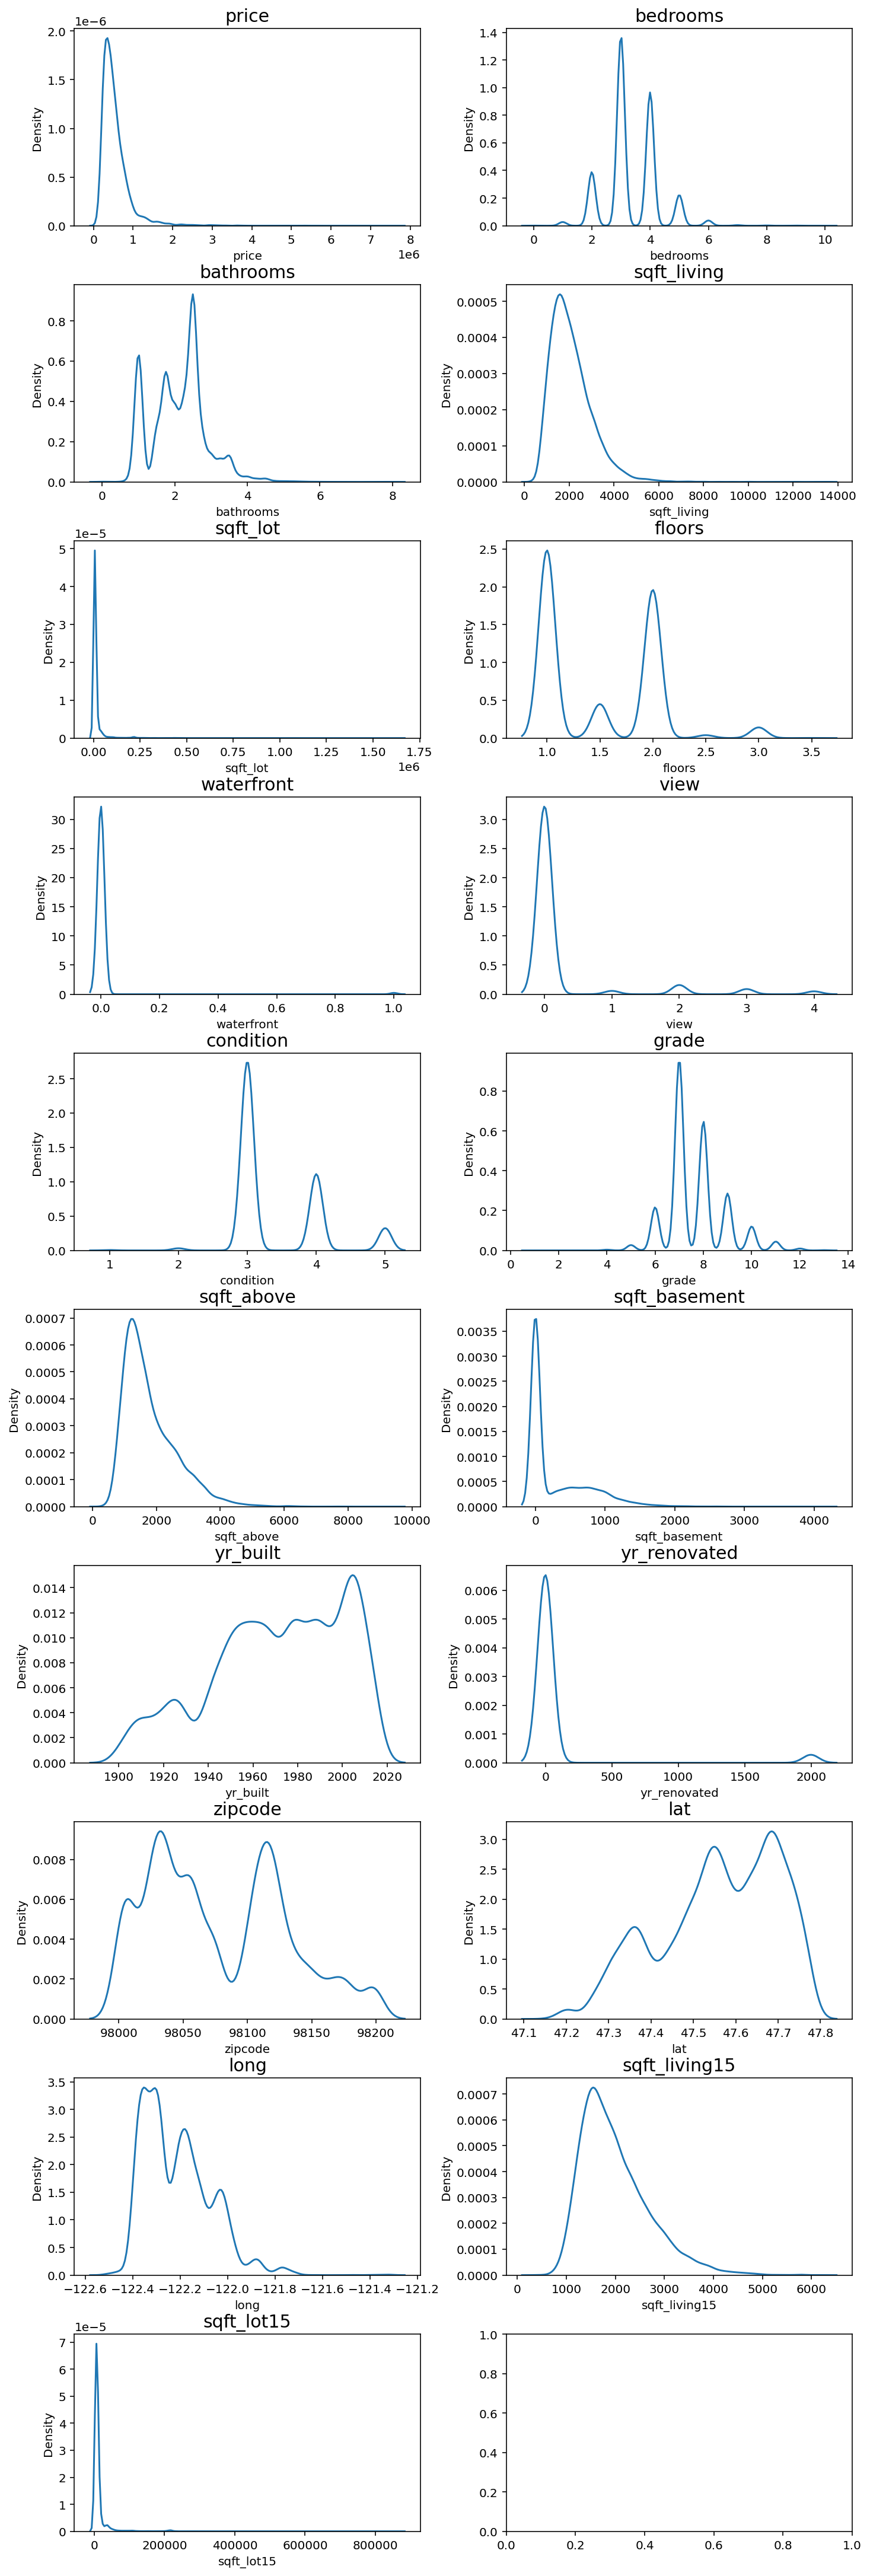

time: 4.71 s (started: 2021-02-18 18:05:26 +09:00)


In [ ]:
fig, ax = plt.subplots(10, 2, figsize=(10, 30))
ax = [ y for x in ax for y in x ]

for i, col in enumerate(columns[1:]):
    sns.kdeplot(data[col], ax=ax[i])
    ax[i].set_title(col, fontsize=15)
plt.tight_layout(pad=0)

- 분포 확인 결과, `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `sqft_lot15`가 한쪽으로 치우친 것을 확인할 수 있었다.
- 이 feature에 대하여 log-scaling을 진행하여 정규분포에 가깝도록 데이터를 변환하도록 한다.
- 정규분포에서 멀어질 수록 왜도 절대값이 커지고, 첨도의 값이 커진다. 이 정보를 활용하면, 해당 feature들이 정규화의 대상이 됨은 그래프 뿐만 아니라 이전의 feature 별 통계 자료에서 왜도(skew)와 첨도(kurt) 값을 통하여 확일할 수 있다.

In [ ]:
log_scaling_target_columns = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15']

time: 318 µs (started: 2021-02-18 19:12:47 +09:00)


In [ ]:
for column in log_scaling_target_columns:
    data[column] = np.log1p(data[column].values)
    if column != 'price': sub[column] = np.log1p(sub[column].values)

time: 8.55 ms (started: 2021-02-18 19:12:47 +09:00)


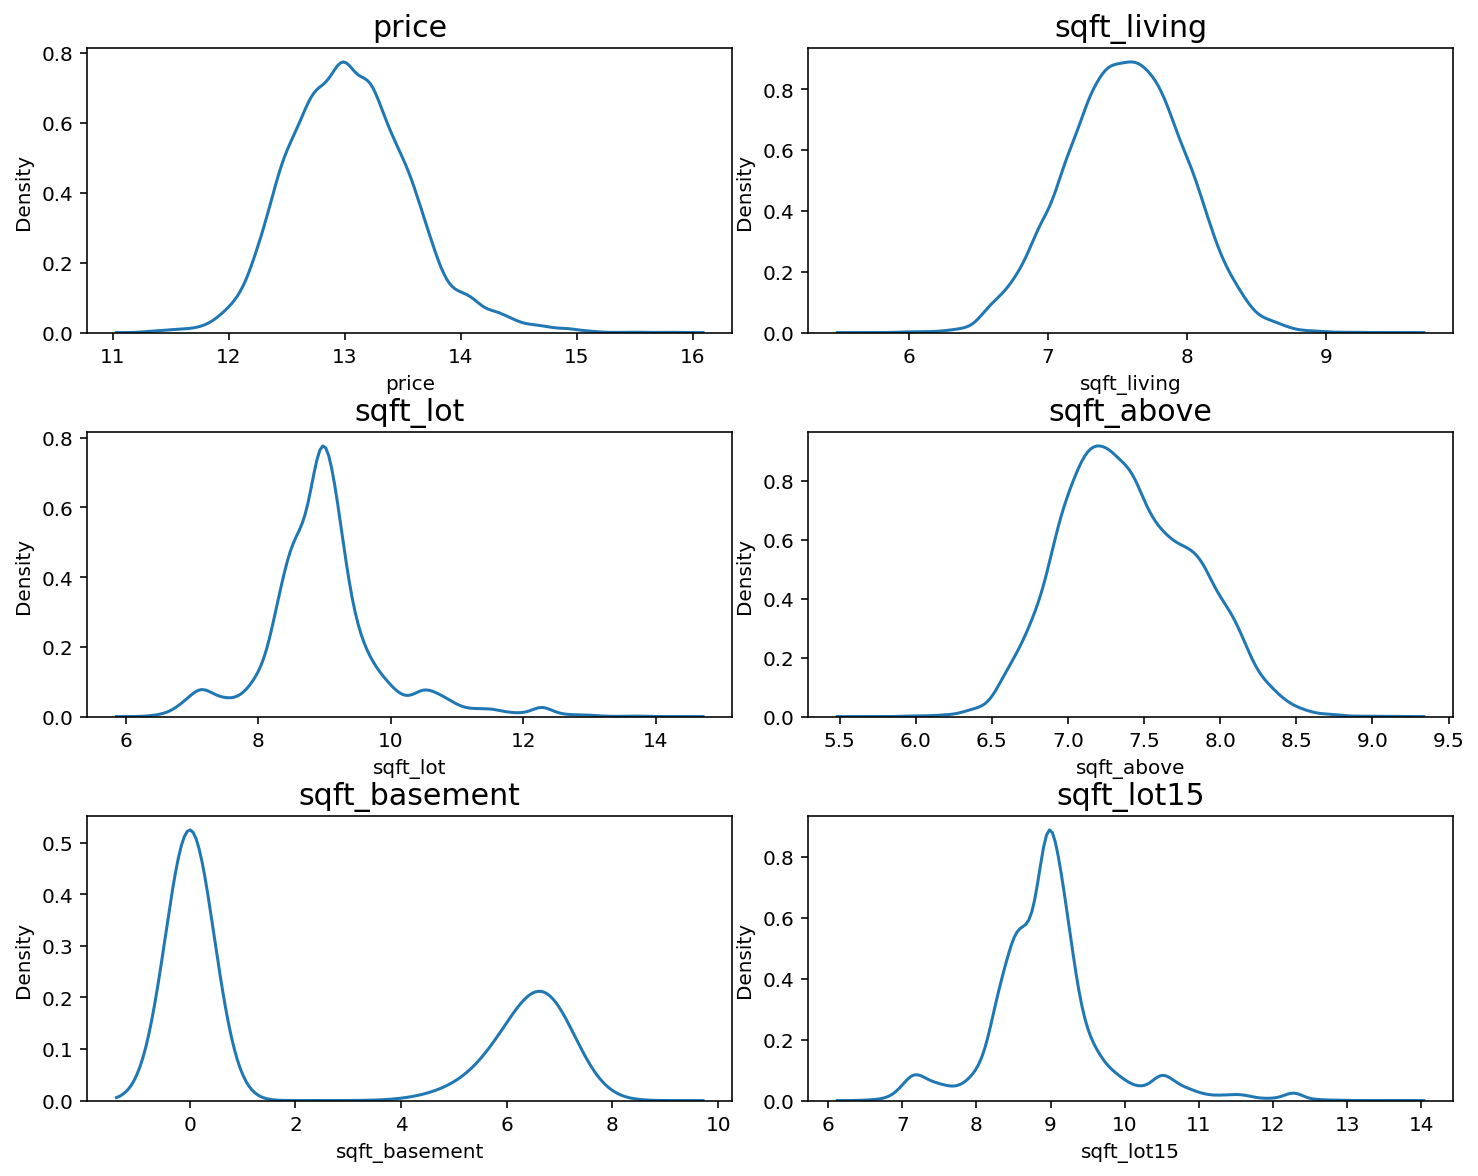

time: 1.39 s (started: 2021-02-18 13:10:05 +09:00)


In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 8))
ax = [ y for x in ax for y in x ]

for i, col in enumerate(log_scaling_target_columns):
    sns.kdeplot(data[col], ax=ax[i])
    ax[i].set_title(col, fontsize=15)
plt.tight_layout(pad=0)

<br/>
<br/>

> 이후의 EAD에 등장하는 plot는 [House Price Prediction EDA](https://www.kaggle.com/chocozzz/house-price-prediction-eda-updated-2019-03-12)를 참고하여 작성하였습니다.

<br/>
<br/>

#### 스피어만 순위 상관관계
- 가격과 가장 상관관계가 높은 순서대로 스피어만 순위 상관관계를 본 히트맵을 출력해 본다.

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


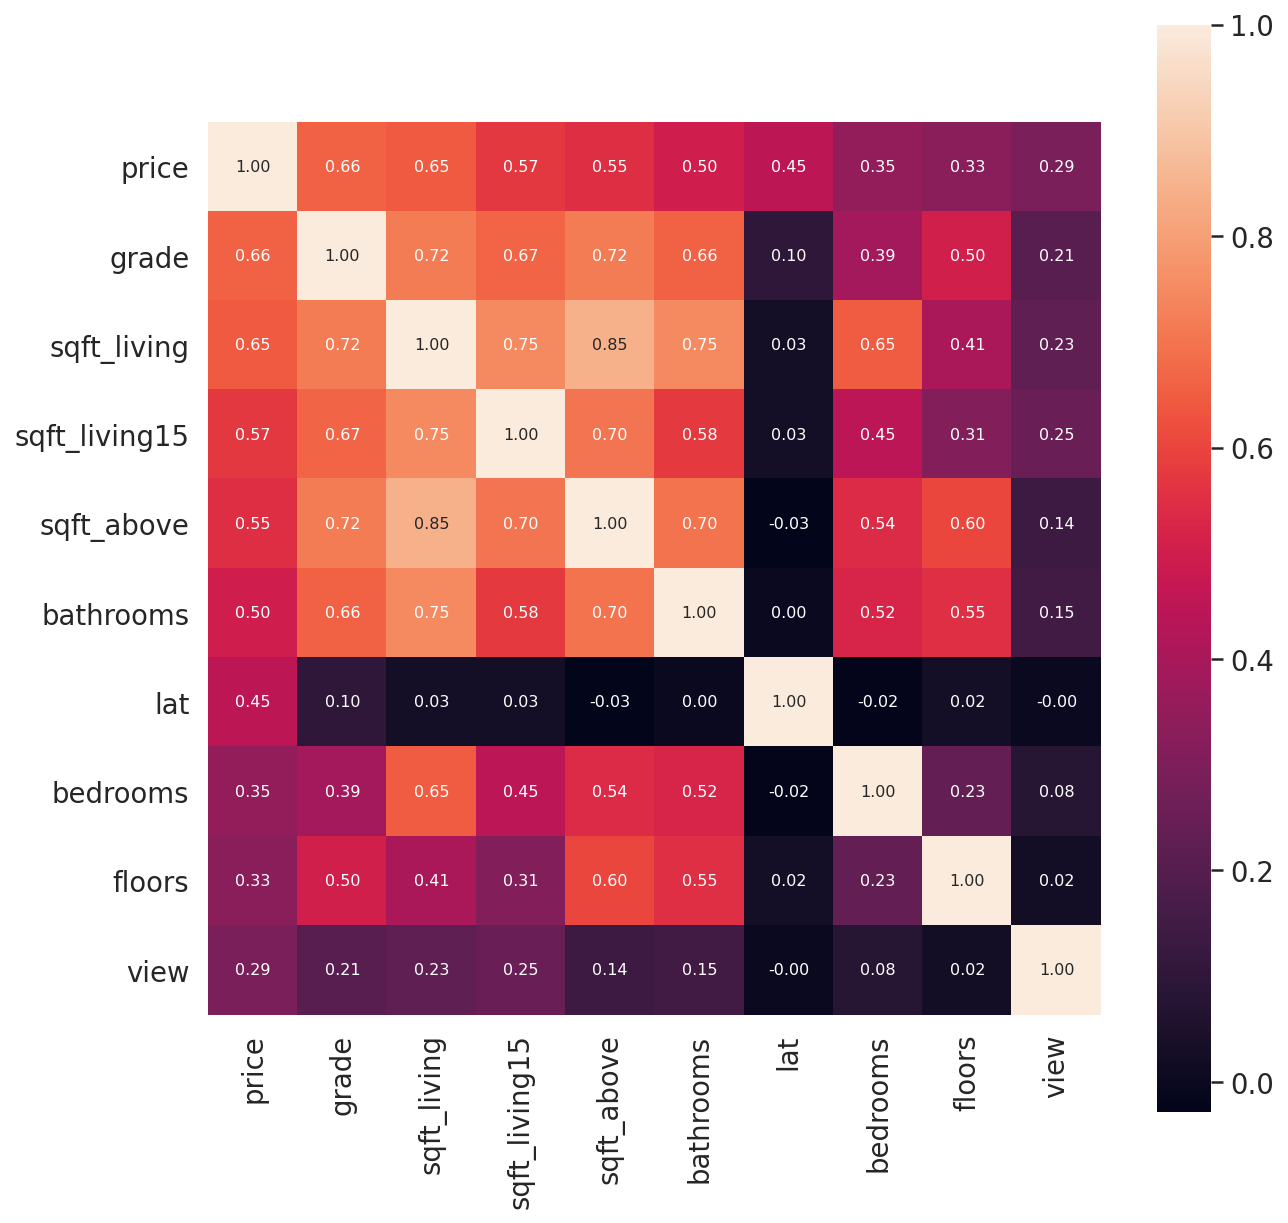

time: 566 ms (started: 2021-02-18 13:10:07 +09:00)


In [ ]:
import scipy as sp

cor_abs = abs(data.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=10, columns='price').index

# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(data[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

- 확인결과 `price`와 상관도가 높은 feature는 순서대로 grade(집의 등급), sqft_living / sqft_living15(주거 공간의 넓이), sqft_above(지하실의 제외한 전체 넒이), bathrooms(화장실의 수), lat(위도)이다.
- `price`와 구해진 feature들의 관계를 그래프로 나타내 보자

- **price와 grade**

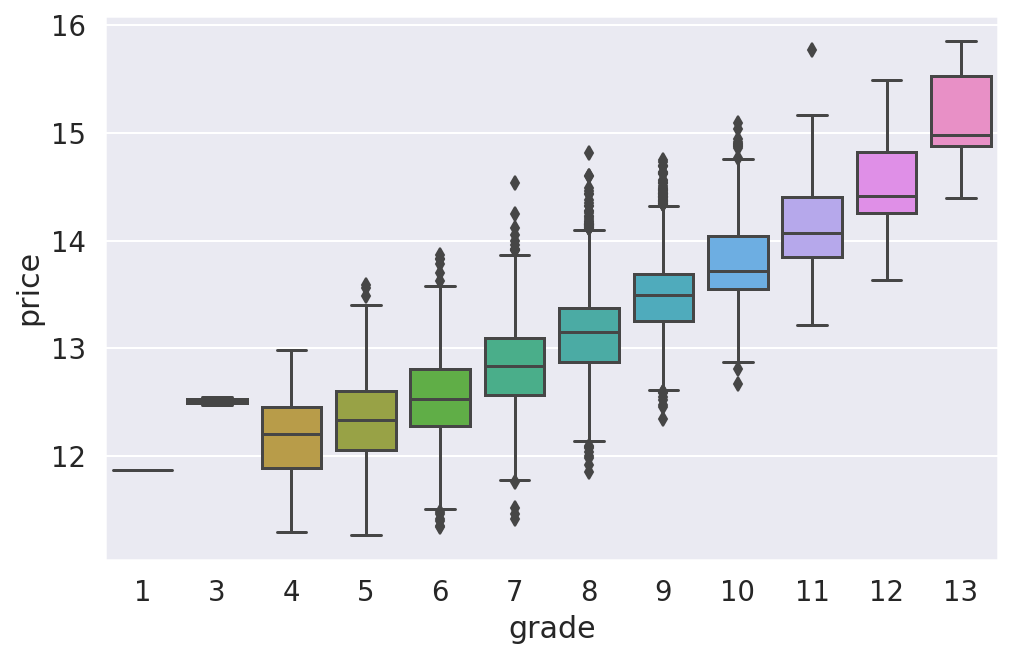

time: 320 ms (started: 2021-02-18 10:14:08 +09:00)


In [ ]:
figure, ax = plt.subplots(figsize=(8,5))
ax = sns.boxplot(x='grade', y='price', data=data[['price', 'grade']])

- median 값을 기준으로 보았을 때, price와 grade가 선형관계가 있음을 확인할 수 있다.
- 이상치
    - grade가 3일때, 선형을 약간 벗어하는 것이 보인다.
    - grade가 11일때, 평균적인 범위를 벗어나 높은 값을 보이는 데이터가 하나 존재하는 것이 보인다.

In [ ]:
data[(data['grade']==3) | ((data['grade']==4) & (data['price'] > 12.4))].sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
339,339,20140523T000000,80000.00000,1,0.75000,430,5050,1.00000,0,0,2,4,430,0,1912,0,98014,47.64990,-121.90900,1200,7500
11523,11523,20150418T000000,90000.00000,1,1.00000,560,4120,1.00000,0,0,3,4,560,0,1947,0,98106,47.53350,-122.34800,980,4120
10171,10171,20150408T000000,95000.00000,2,1.00000,960,7000,1.00000,0,0,3,4,960,0,1918,0,98198,47.38640,-122.30700,1850,8120
11385,11385,20140703T000000,100000.00000,2,0.75000,660,5240,1.00000,0,0,4,4,660,0,1912,0,98032,47.38810,-122.23400,850,5080
5607,5607,20140619T000000,120000.00000,2,1.00000,990,39964,1.00000,0,0,2,4,990,0,1945,0,98042,47.35770,-122.08500,1560,8990
774,774,20141105T000000,140000.00000,1,1.00000,730,6890,1.00000,0,0,4,4,730,0,1926,0,98055,47.46700,-122.21500,1790,7969
10968,10968,20140724T000000,150000.00000,2,1.00000,850,54000,1.50000,0,0,1,4,850,0,1950,0,98023,47.29590,-122.37700,1550,14440
13439,13439,20150301T000000,151000.00000,2,0.75000,720,5040,1.00000,0,0,3,4,720,0,1949,0,98106,47.53230,-122.34700,1290,4120
9820,9820,20140725T000000,152000.00000,2,1.00000,700,13500,1.00000,0,0,3,4,700,0,1920,0,98031,47.38820,-122.20800,1600,10124
8428,8428,20150219T000000,156000.00000,1,0.75000,470,15000,1.00000,0,0,3,4,470,0,1947,0,98014,47.65540,-121.90800,1730,22500


time: 23 ms (started: 2021-02-18 19:10:27 +09:00)


- id=2302인 데이터 : 비슷한 가격을 가진 grade=4인 집들과 비교하여 스펙에서의 큰 차이가 보이지 않으므로 이상치가 아니라고 생각된다.
- id=4123인 데이터 : 비슷한 가격을 가진 grade=4인 집들과 비교하면 크기가 작은 편이고, bedrooms의 갯수도 0개인것을 볼 수 있다. 주거시설이 아니라고 가정한다면 bedrooms의 수는 문제가 되지 않고 크기 역시 비슷한 가격대에서 가장 낮은 값을 가지는 id=12545인 데이터와 비슷한 크기를 가지기 때문에 문제가 되는 않는 수치라고 생각할 수 있다. 따라서 이상치라고 판단하지 않기로 하였다.

In [ ]:
data[(data['price'] > 15) & (data['grade'] == 11)].sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.50000,9.21443,10.52745,2.00000,1,2,3,11,8.94651,7.76684,1940,2001,98004,47.65000,-122.21400,3930,10.14447
1499,1499,20141114T000000,15.16358,4,4.25000,8.66060,9.96651,2.00000,1,4,4,11,8.66060,0.00000,1980,0,98040,47.58500,-122.22200,4620,10.03228
4598,4598,20150421T000000,15.11024,6,4.75000,8.60904,9.87313,1.50000,1,4,5,11,8.27155,7.35947,1936,0,98105,47.65150,-122.27700,3510,9.66846
10645,10645,20140911T000000,15.10774,4,3.25000,8.48281,10.01046,2.00000,1,4,4,11,8.48281,0.00000,1990,0,98039,47.64090,-122.24100,3820,10.14968
7297,7297,20150508T000000,15.03929,4,4.00000,8.35726,9.37297,2.00000,0,0,3,11,8.09590,6.88857,1939,2010,98112,47.63800,-122.28800,4260,9.25043
14231,14231,20150402T000000,15.02298,5,3.75000,8.58504,9.63959,1.00000,0,1,3,11,8.01994,7.74544,2008,0,98004,47.64800,-122.21800,3740,9.67665
9814,9814,20140904T000000,15.00943,5,4.75000,8.73247,9.53777,2.00000,1,4,4,11,8.39863,7.47364,1989,0,98008,47.60500,-122.11200,2940,9.51237
12646,12646,20141230T000000,15.00943,3,3.25000,8.34783,10.62864,1.00000,1,4,4,11,7.80832,7.47364,1958,1987,98008,47.60830,-122.11000,3810,10.32226


time: 13.6 ms (started: 2021-02-18 19:12:58 +09:00)


- id=2775인 데이터 : 특별한 이유가 없이 가격이 높은 것을 보인다. 이상치로 생각되며 전처리 과정에서 이를 삭제할 것이다.

In [ ]:
outlier_ids = [ 2775 ]

time: 1.22 ms (started: 2021-02-18 19:13:00 +09:00)


- **price와 sqft_living / sqrt_living15 / sqft_above**

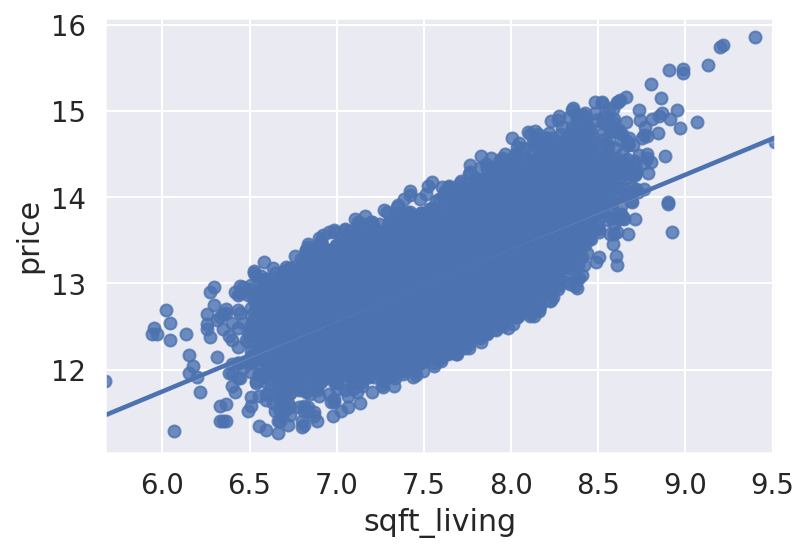

time: 828 ms (started: 2021-02-18 13:10:16 +09:00)


In [ ]:
figure, ax = plt.subplots(figsize=(6,4))
ax = sns.regplot(x='sqft_living', y='price', data=data[['price', 'sqft_living']])

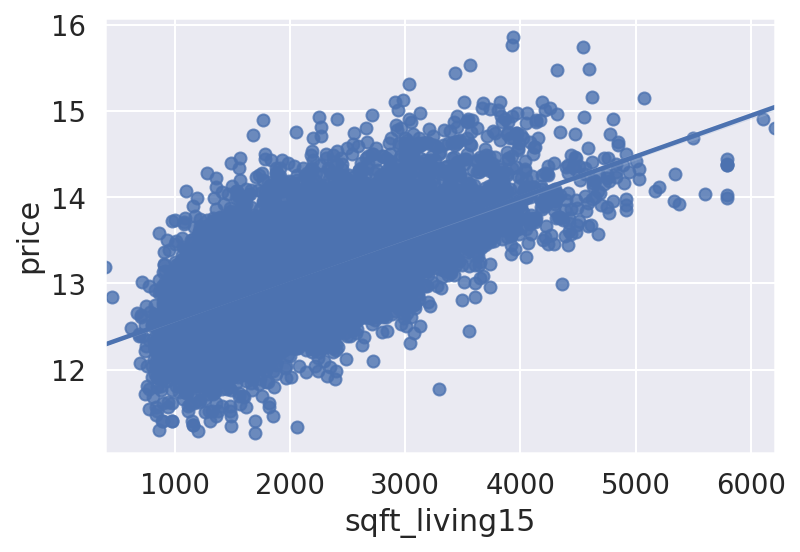

time: 757 ms (started: 2021-02-18 13:10:17 +09:00)


In [ ]:
figure, ax = plt.subplots(figsize=(6,4))
ax = sns.regplot(x='sqft_living15', y='price', data=data[['price', 'sqft_living15']])

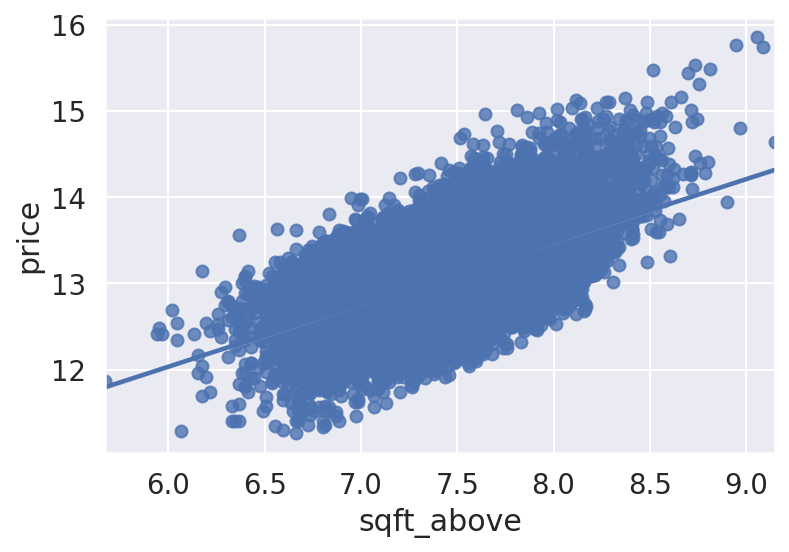

time: 744 ms (started: 2021-02-18 13:10:18 +09:00)


In [ ]:
figure, ax = plt.subplots(figsize=(6,4))
ax = sns.regplot(x='sqft_above', y='price', data=data[['price', 'sqft_above']])

- 세가지 feature와 price는 선형관계가 있음을 확인할 수 있었다.
- 세 값과 price의 관계의 그래프 상에서는 값들의 경향성을 고려하였을 때, 이상치라고 판단 될만한 값이 존재하지 않는다.

- **price와 bathrooms**

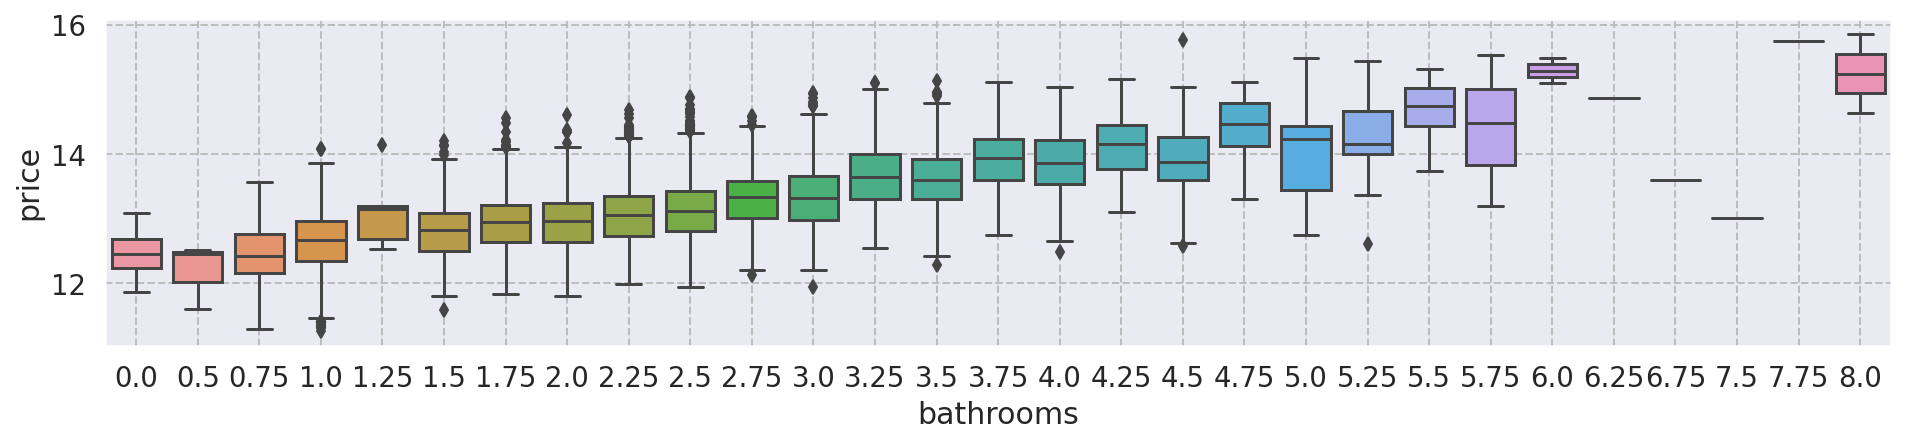

time: 496 ms (started: 2021-02-18 13:10:19 +09:00)


In [ ]:
figure, ax = plt.subplots(figsize=(16,3))
ax = sns.boxplot(x='bathrooms', y='price', data=data[['price', 'bathrooms']])
ax.grid(color='#BDBDBD', linestyle='--', linewidth=1, )

- median 값을 기준으로 보았을 때, price와 bathrooms가 선형관계가 있음을 확인할 수 있다.
- bathrooms가 6.75~7.5일 때, price가 갑자기 뚝 떨어지는 것이 관찰되었다. 하지만, bathrooms에 소수점 자리가 들어가는 것 때문에 데이터의 제대로 된 해석이 어려워 이 값이 이상치인치 특이치인지 판단이 어렵다.

- **price와 bedrooms**

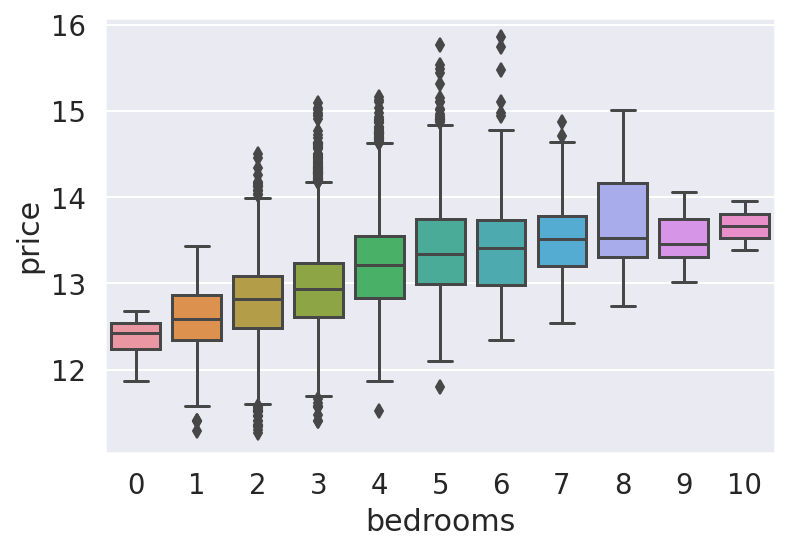

time: 256 ms (started: 2021-02-18 13:10:21 +09:00)


In [ ]:
figure, ax = plt.subplots(figsize=(6,4))
ax = sns.boxplot(x='bedrooms', y='price', data=data[['price', 'bedrooms']])

- median 값을 기준으로 보았을 때, price와 bedrooms가 선형관계가 있음을 확인할 수 있다.
- price의 범위가 전체적으로 이전에 살펴보았던 그래프들에 비해서는 넓은 것을 통하여 price를 결정하는데에 bedrooms이 큰 영향을 미치지 않음을 다시 한 번 확인할 수 있었다.

### 결측치 확인

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

time: 6.99 ms (started: 2021-02-18 18:06:26 +09:00)


In [ ]:
sub.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

time: 4.55 ms (started: 2021-02-18 18:06:26 +09:00)


다행히도 데이터셋에 결측치는 존재하지 않는다!

## STEP 2. 데이터 전처리
---

### 이상치 제거
이전 단계에서 분류한 이상치를 데이터에서 제거한다. 이상치 값의 id는 `outlier_ids`에 정의 되어 있다.

In [ ]:
data_outlier_removed = data.drop(data[data['id'].isin(outlier_ids)].index)

time: 3.13 ms (started: 2021-02-18 19:13:07 +09:00)


In [ ]:
data_outlier_removed[data_outlier_removed['id'].isin(outlier_ids)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


time: 6.13 ms (started: 2021-02-18 19:13:08 +09:00)


### feature 가공

#### date
연월만 고려하는 숫자형 데이터로 변환한다.

In [ ]:
data_outlier_removed['date'] = data_outlier_removed['date'].apply(lambda x : str(x[:6])).astype(int)
data_outlier_removed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,12.30999,3,1.00000,7.07412,8.63959,1.00000,0,0,3,7,7.07412,0.00000,1955,0,98178,47.51120,-122.25700,1340,8.63959
1,1,201502,12.10072,2,1.00000,6.64769,9.21044,1.00000,0,0,3,6,6.64769,0.00000,1933,0,98028,47.73790,-122.23300,2720,8.99504
2,2,201502,13.14217,3,2.00000,7.42714,8.99727,1.00000,0,0,3,8,7.42714,0.00000,1987,0,98074,47.61680,-122.04500,1800,8.92319
3,3,201406,12.45878,3,2.25000,7.44775,8.82761,2.00000,0,0,3,7,7.44775,0.00000,1995,0,98003,47.30970,-122.32700,2238,8.82761
4,4,201501,12.58400,3,1.50000,6.96697,9.18112,1.00000,0,0,3,7,6.96697,0.00000,1963,0,98198,47.40950,-122.31500,1650,9.18112


time: 18.2 ms (started: 2021-02-18 19:13:09 +09:00)


In [ ]:
sub['date'] = sub['date'].apply(lambda x : str(x[:6])).astype(int)
sub.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,201412,3,2.25000,7.85205,8.88779,2.00000,0,0,3,7,7.68294,5.99396,1951,1991,98125,47.72100,-122.31900,1690,8.94115
1,15036,201412,4,3.00000,7.58121,8.51739,1.00000,0,0,5,7,6.95750,6.81454,1965,0,98136,47.52080,-122.39300,1360,8.51739
2,15037,201405,4,4.50000,8.59804,11.53205,1.00000,0,0,3,11,8.26642,7.33368,2001,0,98053,47.65610,-122.00500,4760,11.53205
3,15038,201504,3,1.00000,7.48493,8.91878,1.00000,0,0,3,7,6.95750,6.59441,1960,0,98146,47.51230,-122.33700,1780,9.00135
4,15039,201503,3,2.50000,7.54486,8.78890,2.00000,0,0,3,7,7.54486,0.00000,2003,0,98038,47.36840,-122.03100,2390,8.93208


time: 13.7 ms (started: 2021-02-18 19:13:10 +09:00)


#### id
집값 예측에 불필요하므로 제거한다.

In [ ]:
data_drop_id = data_outlier_removed.drop('id', axis=1).reindex()
data_drop_id.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

time: 10.5 ms (started: 2021-02-18 19:13:10 +09:00)


In [ ]:
sub_drop_id = sub.drop('id', axis=1).reindex()
sub_drop_id.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

time: 5.23 ms (started: 2021-02-18 19:13:11 +09:00)


### label 분리

In [ ]:
y_train = data_drop_id['price']
x_train = data_drop_id.drop('price', axis=1)
x_test = sub_drop_id

time: 2.63 ms (started: 2021-02-18 19:13:13 +09:00)


In [ ]:
print(f'x_train dim : {x_train.shape}')
print(f'y_train dim : {y_train.shape}')
print(f'x_test dim : {x_test.shape}')

x_train dim : (15034, 19)
y_train dim : (15034,)
x_test dim : (6468, 19)
time: 560 µs (started: 2021-02-18 19:13:14 +09:00)


## STEP 3.  모델링과 하이퍼 파라미터 튜닝
---

### [Try 0] Check R-Squared Value
- cross validation을 통하여 r-squared 값을 구하여, 사용할 모델의 성능을 평가해 본다.
- 이번 프로젝트에서는 총 세가지 모델(GBoost, XGB, Light GBM)을 사용할 것이다.

In [ ]:
gboost = GradientBoostingRegressor(random_state=RANDOM_STATE)
xgboost = xgb.XGBRegressor(random_state=RANDOM_STATE)
lightgbm = lgb.LGBMRegressor(random_state=RANDOM_STATE)

models = [{'model':gboost, 'name':'GradientBoosting'},
          {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

time: 599 µs (started: 2021-02-18 19:10:59 +09:00)


In [ ]:
get_cv_score(x_train, y_train, models)

Model GradientBoosting CV score : 0.8584
Model XGBoost CV score : 0.8761
Model LightGBM CV score : 0.8853
time: 18.2 s (started: 2021-02-18 19:11:01 +09:00)


### [Try 1] Simple lightGBM
임의로 구성된 하이퍼 파라미터들을 입력한 lightBGM 모델을 학습시키고 결과를 확인하여 본다.

In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'max_depth': 16,
    'n_estimators':1000,
    'boosting':'gbdt',
    'seed':RANDOM_STATE,
    'force_col_wise': True
}

try_1_model, try_1_predict = train_lightgbm_cross_val(x_train, y_train, x_test, params)

⏳ [train_lightgbm_cross_val] start ...
[LightGBM] [Info] Total Bins 2299
[LightGBM] [Info] Number of data points in the train set: 12027, number of used features: 19
[LightGBM] [Info] Start training from score 13.044115
Training until validation scores don't improve for 30 rounds
[100]	valid_0's rmse: 0.282692
[200]	valid_0's rmse: 0.19847
[300]	valid_0's rmse: 0.173329
[400]	valid_0's rmse: 0.164975
[500]	valid_0's rmse: 0.161527
[600]	valid_0's rmse: 0.159635
[700]	valid_0's rmse: 0.158733
[800]	valid_0's rmse: 0.158118
[900]	valid_0's rmse: 0.157715
[1000]	valid_0's rmse: 0.157396
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.157396
[LightGBM] [Info] Total Bins 2302
[LightGBM] [Info] Number of data points in the train set: 12027, number of used features: 19
[LightGBM] [Info] Start training from score 13.044142
Training until validation scores don't improve for 30 rounds
[100]	valid_0's rmse: 0.281501
[200]	valid_0's rmse: 0.201716
[300]	valid_0's rmse: 0.17

### [Try 2] lightGBM - grid search

- `sklearn.model_selection.GridSearchCV` 함수를 이용하여 lightGBM을 대상으로한 gride search를 진행하여 보자.
- search의 대상이 되는 파라미터는 아래와 같다.
    - num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
    - learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
    - max_depth : 의사 결정 나무의 깊이, 정수 사용
    - n_estimators : 사용하는 개별 모델의 개수, 보통 100 이상의 정수 사용
    - boosting_type : 부스팅 방식
        - gdbt : Traditional Gradient Boosting Decision Tree
        - rf : Random Forest
        - dart : Dropouts meet Multiple Additive Regression Trees
        - goss : Gradient-based One-Side Sampling
- 한 번에 많은 양을 실험하기보다는 파라미터 하나씩 값을 확정해 나가는 식으로 실험을 진행하고자 한다.

In [ ]:
def get_param_grid_base():
    return {
        'num_leaves' : [100],
        'learning_rate' : [0.01],
        'max_depth' : [16],
        'n_estimators' : [1000],
        'boosting_type' : ['gbdt'],
        'min_data_in_leaf': [10],
        'feature_fraction': [0.7],
        'force_col_wise': [True]
    }

time: 414 µs (started: 2021-02-18 19:13:57 +09:00)


#### find optimal `num_leaves`

- (Try 1) [64, 128, 256, 512, 1024]

In [ ]:
param_grid_num_leaves_1 = get_param_grid_base()
param_grid_num_leaves_1['num_leaves'] = [64, 128, 256, 512, 1024]
param_grid_num_leaves_1

{'num_leaves': [64, 128, 256, 512, 1024],
 'learning_rate': [0.01],
 'max_depth': [16],
 'n_estimators': [1000],
 'boosting_type': ['gbdt'],
 'min_data_in_leaf': [10],
 'feature_fraction': [0.7],
 'force_col_wise': [True]}

time: 2.48 ms (started: 2021-02-18 11:21:51 +09:00)


In [ ]:
grid_num_leaves_1_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_num_leaves_1_res = grid_search(grid_num_leaves_1_model,
                                    x_train, y_train,
                                    param_grid_num_leaves_1, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
4,gbdt,0.70000,True,0.01000,16,10,1000,1024,-0.02770,0.16644
3,gbdt,0.70000,True,0.01000,16,10,1000,512,-0.02741,0.16555
2,gbdt,0.70000,True,0.01000,16,10,1000,256,-0.02651,0.16282
1,gbdt,0.70000,True,0.01000,16,10,1000,128,-0.02595,0.16109
0,gbdt,0.70000,True,0.01000,16,10,1000,64,-0.02587,0.16083


⌛ [grid_search] done ...
time: 1min 15s (started: 2021-02-18 11:40:40 +09:00)


- (Try 2) [ 8, 16, 32, 64, 128]

In [ ]:
param_grid_num_leaves_2 = get_param_grid_base()
param_grid_num_leaves_2['num_leaves'] = [ 8, 16, 32, 64, 128]

grid_num_leaves_2_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_num_leaves_2_res = grid_search(grid_num_leaves_2_model,
                                    x_train, y_train,
                                    param_grid_num_leaves_2, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
0,gbdt,0.70000,True,0.01000,16,10,1000,8,-0.03071,0.17524
1,gbdt,0.70000,True,0.01000,16,10,1000,16,-0.02770,0.16644
2,gbdt,0.70000,True,0.01000,16,10,1000,32,-0.02638,0.16240
4,gbdt,0.70000,True,0.01000,16,10,1000,128,-0.02595,0.16109
3,gbdt,0.70000,True,0.01000,16,10,1000,64,-0.02587,0.16083


⌛ [grid_search] done ...
time: 36.6 s (started: 2021-02-18 11:41:55 +09:00)


- (Try 3) [ 64, 80, 96, 112, 128]

In [ ]:
param_grid_num_leaves_3 = get_param_grid_base()
param_grid_num_leaves_3['num_leaves'] = [ 64, 80, 96, 112, 128]

grid_num_leaves_3_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_num_leaves_3_res = grid_search(grid_num_leaves_3_model,
                                    x_train, y_train,
                                    param_grid_num_leaves_3, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
2,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
1,gbdt,0.70000,True,0.01000,16,10,1000,80,-0.02582,0.16069
0,gbdt,0.70000,True,0.01000,16,10,1000,64,-0.02587,0.16083
3,gbdt,0.70000,True,0.01000,16,10,1000,112,-0.02590,0.16093
4,gbdt,0.70000,True,0.01000,16,10,1000,128,-0.02595,0.16109


⌛ [grid_search] done ...
time: 59.2 s (started: 2021-02-18 11:45:34 +09:00)


- (Try 4) [ 80, 84, 88, 92, 96]

In [ ]:
param_grid_num_leaves_4 = get_param_grid_base()
param_grid_num_leaves_4['num_leaves'] = [ 80, 84, 88, 92, 96]

grid_num_leaves_4_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_num_leaves_4_res = grid_search(grid_num_leaves_4_model,
                                    x_train, y_train,
                                    param_grid_num_leaves_4, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
4,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
3,gbdt,0.70000,True,0.01000,16,10,1000,92,-0.02578,0.16057
2,gbdt,0.70000,True,0.01000,16,10,1000,88,-0.02580,0.16061
1,gbdt,0.70000,True,0.01000,16,10,1000,84,-0.02580,0.16064
0,gbdt,0.70000,True,0.01000,16,10,1000,80,-0.02582,0.16069


⌛ [grid_search] done ...
time: 55.7 s (started: 2021-02-18 11:48:55 +09:00)


- Result : num_leaves의 값이 `96`일 때, RMSLE가 `0.16054`로 최저값을 기록하였다.

In [ ]:
param_grid_num_leaves_res = {
    'num_leaves' : [8,16,32,64,80,84,88,92,96,112,128,256,512,1024],
    'RMSLE': [0.17524, 0.16644, 0.16240, 0.16282, 0.16069, 0.16064, 0.16061, 0.16057, 0.16054, 0.16093, 0.16109, 0.16282, 0.16555, 0.16644]
}

param_grid_num_leaves_res_df = pd.DataFrame(param_grid_num_leaves_res, columns=['num_leaves', 'RMSLE'])
param_grid_num_leaves_res_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
num_leaves,8.00000,16.00000,32.00000,64.00000,80.00000,84.00000,88.00000,92.00000,96.00000,112.00000,128.00000,256.00000,512.00000,1024.00000
RMSLE,0.17524,0.16644,0.16240,0.16282,0.16069,0.16064,0.16061,0.16057,0.16054,0.16093,0.16109,0.16282,0.16555,0.16644


time: 9.87 ms (started: 2021-02-18 15:05:23 +09:00)


- 개선사항
    - `optimal_parms` 변수를 정의하여 튜닝이 끝난 하이퍼 파라매터의 값을 저장한다.
    - grid search 전에 이 값을 복사하여 튜닝을 진행하고, 튜닝이 끝나면 파라미터 값을 `optimal_parms`에 업데이트 한다.

In [ ]:
optimal_parms = get_param_grid_base()
optimal_parms['num_leaves'] = [ 96 ]

def copy_optimal_parms():
    return { key: value[:] for key, value in optimal_parms.items() }

time: 860 µs (started: 2021-02-18 19:14:02 +09:00)


#### find optimal `learning_rate`

In [ ]:
param_grid_learning_rate_1 = copy_optimal_parms()
param_grid_learning_rate_1['learning_rate'] = [0.0001, 0.001, 0.01, 0.1]
param_grid_learning_rate_1

{'num_leaves': [96],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1],
 'max_depth': [16],
 'n_estimators': [1000],
 'boosting_type': ['gbdt'],
 'min_data_in_leaf': [10],
 'feature_fraction': [0.7],
 'force_col_wise': [True]}

time: 2.01 ms (started: 2021-02-18 13:16:26 +09:00)


In [ ]:
grid_learning_rate_1_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_learning_rate_1_res = grid_search(grid_learning_rate_1_model,
                                    x_train, y_train,
                                    param_grid_learning_rate_1, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
2,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
3,gbdt,0.70000,True,0.10000,16,10,1000,96,-0.02756,0.16602
1,gbdt,0.70000,True,0.00100,16,10,1000,96,-0.07640,0.27640
0,gbdt,0.70000,True,0.00010,16,10,1000,96,-0.23870,0.48857


⌛ [grid_search] done ...
time: 24 s (started: 2021-02-18 13:16:36 +09:00)


- Result : learning_rate의 값이 `0.01`일 때, RMSLE가 `0.16054`로 최저값을 기록하였다.

In [ ]:
param_grid_learning_rate_res = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'RMSLE': [0.48857, 0.27640, 0.16054, 0.16602]
}

param_grid_learning_rate_res_df = pd.DataFrame(param_grid_learning_rate_res,
                                               columns=['learning_rate', 'RMSLE'])
param_grid_learning_rate_res_df.T

,0,1,2,3
learning_rate,0.00010,0.00100,0.01000,0.10000
RMSLE,0.48857,0.27640,0.16054,0.16602


time: 6.34 ms (started: 2021-02-18 15:05:27 +09:00)


In [ ]:
# update optimal_parms
optimal_parms['learning_rate'] = [ 0.01 ]

time: 417 µs (started: 2021-02-18 19:14:09 +09:00)


#### find optimal `max_depth`

- (Try 1) [8, 16, 32, 64, 128, 256, 512, 1024]

In [ ]:
param_grid_max_depth_1 = copy_optimal_parms()
param_grid_max_depth_1['max_depth'] = [8, 16, 32, 64, 128, 256, 512, 1024]
param_grid_max_depth_1

{'num_leaves': [96],
 'learning_rate': [0.01],
 'max_depth': [8, 16, 32, 64, 128, 256, 512, 1024],
 'n_estimators': [1000],
 'boosting_type': ['gbdt'],
 'min_data_in_leaf': [10],
 'feature_fraction': [0.7],
 'force_col_wise': [True]}

time: 2.89 ms (started: 2021-02-18 13:24:04 +09:00)


In [ ]:
grid_max_depth_1_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_max_depth_1_res = grid_search(grid_max_depth_1_model,
                                    x_train, y_train,
                                    param_grid_max_depth_1, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
1,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
3,gbdt,0.70000,True,0.01000,64,10,1000,96,-0.02580,0.16063
4,gbdt,0.70000,True,0.01000,128,10,1000,96,-0.02580,0.16063
5,gbdt,0.70000,True,0.01000,256,10,1000,96,-0.02580,0.16063
6,gbdt,0.70000,True,0.01000,512,10,1000,96,-0.02580,0.16063
7,gbdt,0.70000,True,0.01000,1024,10,1000,96,-0.02580,0.16063
2,gbdt,0.70000,True,0.01000,32,10,1000,96,-0.02581,0.16066
0,gbdt,0.70000,True,0.01000,8,10,1000,96,-0.02600,0.16125


⌛ [grid_search] done ...
time: 38.3 s (started: 2021-02-18 13:24:36 +09:00)


- (Try 2) [16, 24, 32, 40, 48, 56, 64]

In [ ]:
param_grid_max_depth_2 = copy_optimal_parms()
param_grid_max_depth_2['max_depth'] = [16, 24, 32, 40, 48, 56, 64]
param_grid_max_depth_2

{'num_leaves': [96],
 'learning_rate': [0.01],
 'max_depth': [16, 24, 32, 40, 48, 56, 64],
 'n_estimators': [1000],
 'boosting_type': ['gbdt'],
 'min_data_in_leaf': [10],
 'feature_fraction': [0.7],
 'force_col_wise': [True]}

time: 2.28 ms (started: 2021-02-18 13:28:44 +09:00)


In [ ]:
grid_max_depth_2_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_max_depth_2_res = grid_search(grid_max_depth_2_model,
                                    x_train, y_train,
                                    param_grid_max_depth_2, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
0,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
3,gbdt,0.70000,True,0.01000,40,10,1000,96,-0.02580,0.16063
4,gbdt,0.70000,True,0.01000,48,10,1000,96,-0.02580,0.16063
5,gbdt,0.70000,True,0.01000,56,10,1000,96,-0.02580,0.16063
6,gbdt,0.70000,True,0.01000,64,10,1000,96,-0.02580,0.16063
2,gbdt,0.70000,True,0.01000,32,10,1000,96,-0.02581,0.16066
1,gbdt,0.70000,True,0.01000,24,10,1000,96,-0.02585,0.16078


⌛ [grid_search] done ...
time: 34.5 s (started: 2021-02-18 13:29:02 +09:00)


- (Try 3) [16, 20, 24, 28, 32, 36, 40]

In [ ]:
param_grid_max_depth_3 = copy_optimal_parms()
param_grid_max_depth_3['max_depth'] = [16, 20, 24, 28, 32, 36, 40]

grid_max_depth_3_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_max_depth_3_res = grid_search(grid_max_depth_3_model,
                                    x_train, y_train,
                                    param_grid_max_depth_3, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
0,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
5,gbdt,0.70000,True,0.01000,36,10,1000,96,-0.02580,0.16063
6,gbdt,0.70000,True,0.01000,40,10,1000,96,-0.02580,0.16063
4,gbdt,0.70000,True,0.01000,32,10,1000,96,-0.02581,0.16066
1,gbdt,0.70000,True,0.01000,20,10,1000,96,-0.02583,0.16071
3,gbdt,0.70000,True,0.01000,28,10,1000,96,-0.02584,0.16073
2,gbdt,0.70000,True,0.01000,24,10,1000,96,-0.02585,0.16078


⌛ [grid_search] done ...
time: 45.2 s (started: 2021-02-18 13:37:23 +09:00)


- (Try 4) [16, 17, 18, 19]

In [ ]:
param_grid_max_depth_4 = copy_optimal_parms()
param_grid_max_depth_4['max_depth'] = [16, 17, 18, 19]

grid_max_depth_4_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_max_depth_4_res = grid_search(grid_max_depth_4_model,
                                    x_train, y_train,
                                    param_grid_max_depth_4, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
0,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
2,gbdt,0.70000,True,0.01000,18,10,1000,96,-0.02579,0.16058
1,gbdt,0.70000,True,0.01000,17,10,1000,96,-0.02581,0.16066
3,gbdt,0.70000,True,0.01000,19,10,1000,96,-0.02585,0.16078


⌛ [grid_search] done ...
time: 49.2 s (started: 2021-02-18 13:56:00 +09:00)


- (Try 5) [9, 11, 13, 15, 16]

In [ ]:
param_grid_max_depth_5 = copy_optimal_parms()
param_grid_max_depth_5['max_depth'] = [9, 11, 13, 15, 16]

grid_max_depth_5_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_max_depth_5_res = grid_search(grid_max_depth_5_model,
                                    x_train, y_train,
                                    param_grid_max_depth_5, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
4,gbdt,0.70000,True,0.01000,16,10,1000,96,-0.02577,0.16054
1,gbdt,0.70000,True,0.01000,11,10,1000,96,-0.02580,0.16063
3,gbdt,0.70000,True,0.01000,15,10,1000,96,-0.02584,0.16074
2,gbdt,0.70000,True,0.01000,13,10,1000,96,-0.02587,0.16085
0,gbdt,0.70000,True,0.01000,9,10,1000,96,-0.02591,0.16095


⌛ [grid_search] done ...
time: 44.1 s (started: 2021-02-18 13:58:11 +09:00)


- Result : max_depth 값이 `16`일 때, RMSLE가 `0.16054`로 최저값을 기록하였다.

In [ ]:
param_grid_max_depth_res = {
    'max_depth' : [8, 9, 11, 13, 15, 16, 17, 18, 19, 20, 24, 28, 32, 36, 40, 48, 56, 64, 128, 256, 512, 1024],
    'RMSLE': [ 0.16125, 0.16095, 0.16063, 0.16085, 0.16074, 0.16054,
               0.16066, 0.16058, 0.16078, 0.16071, 0.16078, 0.16073, 0.16066, 0.16063,
               0.16063, 0.16063, 0.16063, 0.16063, 0.16063, 0.16063, 0.16063, 0.16063 ]
}

param_grid_max_depth_res_df = pd.DataFrame(param_grid_max_depth_res,
                                          columns=['max_depth', 'RMSLE'])
param_grid_max_depth_res_df

,max_depth,RMSLE
0,8,0.16125
1,9,0.16095
2,11,0.16063
3,13,0.16085
4,15,0.16074
5,16,0.16054
6,17,0.16066
7,18,0.16058
8,19,0.16078
9,20,0.16071


time: 7.53 ms (started: 2021-02-18 15:05:52 +09:00)


In [ ]:
# update optimal_parms
optimal_parms['max_depth'] = [ 16 ]

time: 306 µs (started: 2021-02-18 19:14:17 +09:00)


#### find optimal `n_estimators`

- (Try 1) [64, 128, 256, 512, 1024]

In [ ]:
param_grid_n_estimators_1 = get_param_grid_base()
param_grid_n_estimators_1['n_estimators'] = [64, 128, 256, 512, 1024]
param_grid_n_estimators_1

{'num_leaves': [100],
 'learning_rate': [0.01],
 'max_depth': [16],
 'n_estimators': [64, 128, 256, 512, 1024],
 'boosting_type': ['gbdt'],
 'min_data_in_leaf': [10],
 'feature_fraction': [0.7],
 'force_col_wise': [True]}

time: 2.27 ms (started: 2021-02-18 14:10:55 +09:00)


In [ ]:
grid_n_estimators_1_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_n_estimators_1_res = grid_search(grid_n_estimators_1_model,
                                      x_train, y_train,
                         param_grid_n_estimators_1 = get_param_grid_base()
param_grid_n_estimators_1['n_estimators'] = [64, 128, 256, 512, 1024]             param_grid_n_estimators_1, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
4,gbdt,0.70000,True,0.01000,16,10,1024,100,-0.02584,0.16076
3,gbdt,0.70000,True,0.01000,16,10,512,100,-0.02696,0.16419
2,gbdt,0.70000,True,0.01000,16,10,256,100,-0.03329,0.18246
1,gbdt,0.70000,True,0.01000,16,10,128,100,-0.06024,0.24544
0,gbdt,0.70000,True,0.01000,16,10,64,100,-0.11496,0.33906


⌛ [grid_search] done ...
time: 49 s (started: 2021-02-18 14:11:00 +09:00)


- (Try 2) [1024, 2048, 4096]

In [ ]:
param_grid_n_estimators_2 = get_param_grid_base()
param_grid_n_estimators_2['n_estimators'] = [1024, 2048, 4096]
grid_n_estimators_2_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_n_estimators_2_res = grid_search(grid_n_estimators_2_model,
                                      x_train, y_train,
                                      param_grid_n_estimators_2, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
1,gbdt,0.70000,True,0.01000,16,10,2048,100,-0.02571,0.16033
0,gbdt,0.70000,True,0.01000,16,10,1024,100,-0.02584,0.16076
2,gbdt,0.70000,True,0.01000,16,10,4096,100,-0.02588,0.16087


⌛ [grid_search] done ...
time: 1min 44s (started: 2021-02-18 14:13:25 +09:00)


- (Try 3) [1024, 1280, 1536, 1792, 2048]

In [ ]:
param_grid_n_estimators_3 = get_param_grid_base()
param_grid_n_estimators_3['n_estimators'] = [1024, 1280, 1536, 1792, 2048]
grid_n_estimators_3_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_n_estimators_3_res = grid_search(grid_n_estimators_3_model,
                                      x_train, y_train,
                                      param_grid_n_estimators_3, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
4,gbdt,0.70000,True,0.01000,16,10,2048,100,-0.02571,0.16033
3,gbdt,0.70000,True,0.01000,16,10,1792,100,-0.02571,0.16034
2,gbdt,0.70000,True,0.01000,16,10,1536,100,-0.02573,0.16041
1,gbdt,0.70000,True,0.01000,16,10,1280,100,-0.02577,0.16052
0,gbdt,0.70000,True,0.01000,16,10,1024,100,-0.02584,0.16076


⌛ [grid_search] done ...
time: 1min 46s (started: 2021-02-18 14:18:51 +09:00)


- Result : n_estimators 값이 `2048` 때, RMSLE가 `0.16033`로 최저값을 기록하였다.

In [ ]:
param_grid_n_estimators_res = {
    'n_estimators' : [64, 128, 256, 512, 1024, 1280, 1536, 1792, 2048, 4096],
    'RMSLE': [ 0.33906, 0.24544, 0.18246, 0.16419, 0.16076,
               0.16052, 0.16041, 0.16034, 0.16033, 0.16087 ]
}

param_grid_n_estimators_res_df = pd.DataFrame(param_grid_n_estimators_res,
                                              columns=['n_estimators', 'RMSLE'])
param_grid_n_estimators_res_df.T

,0,1,2,3,4,5,6,7,8,9
n_estimators,64.00000,128.00000,256.00000,512.00000,1024.00000,1280.00000,1536.00000,1792.00000,2048.00000,4096.00000
RMSLE,0.33906,0.24544,0.18246,0.16419,0.16076,0.16052,0.16041,0.16034,0.16033,0.16087


time: 11.1 ms (started: 2021-02-18 14:22:45 +09:00)


In [ ]:
# update optimal_parms
optimal_parms['n_estimators'] = [ 2048 ]

time: 316 µs (started: 2021-02-18 19:14:24 +09:00)


#### find optimal `boosting`

In [ ]:
param_grid_boosting = copy_optimal_parms()
param_grid_boosting['boosting_type'] = ['gbdt', 'rf', 'dart', 'goss']
grid_boosting_model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_boosting_res = grid_search(grid_boosting_model,
                                x_train, y_train,
                                param_grid_boosting, verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,boosting_type,feature_fraction,force_col_wise,learning_rate,max_depth,min_data_in_leaf,n_estimators,num_leaves,score,RMSLE
0,gbdt,0.70000,True,0.01000,16,10,2048,96,-0.02557,0.15990
3,goss,0.70000,True,0.01000,16,10,2048,96,-0.02594,0.16106
2,dart,0.70000,True,0.01000,16,10,2048,96,-0.98748,0.99372
1,rf,0.70000,True,0.01000,16,10,2048,96,nan,nan


⌛ [grid_search] done ...
time: 2min 30s (started: 2021-02-18 14:33:42 +09:00)


- Result : boosting_type의 값이 `gbdt`일 때, RMSLE가 `0.15990`로 최저값을 기록하였다.

In [ ]:
param_grid_boosting_res = {
    'boosting_type' : ['gbdt', 'goss', 'dart'],
    'RMSLE': [0.15990, 0.16106, 0.99372]
}

param_grid_boosting_res_df = pd.DataFrame(param_grid_boosting_res,
                                          columns=['boosting_type', 'RMSLE'])
param_grid_boosting_res_df.T

,0,1,2
boosting_type,gbdt,goss,dart
RMSLE,0.15990,0.16106,0.99372


time: 7.24 ms (started: 2021-02-18 15:00:48 +09:00)


In [ ]:
# update optimal_parms
optimal_parms['boosting_type'] = [ 'gbdt' ]

time: 387 µs (started: 2021-02-18 19:14:29 +09:00)


#### summary
하이퍼 파라미터에 따른 RMSLE 값을 나타내면 다음과 같다.

In [ ]:
titles = ['num_leaves', 'learning_rate', 'max_depth', 'n_estimators', 'boosting_type' ]
dfs = [param_grid_num_leaves_res_df,
       param_grid_learning_rate_res_df,
       param_grid_max_depth_res_df,
       param_grid_n_estimators_res_df,
       param_grid_boosting_res_df]

time: 442 µs (started: 2021-02-18 15:05:57 +09:00)


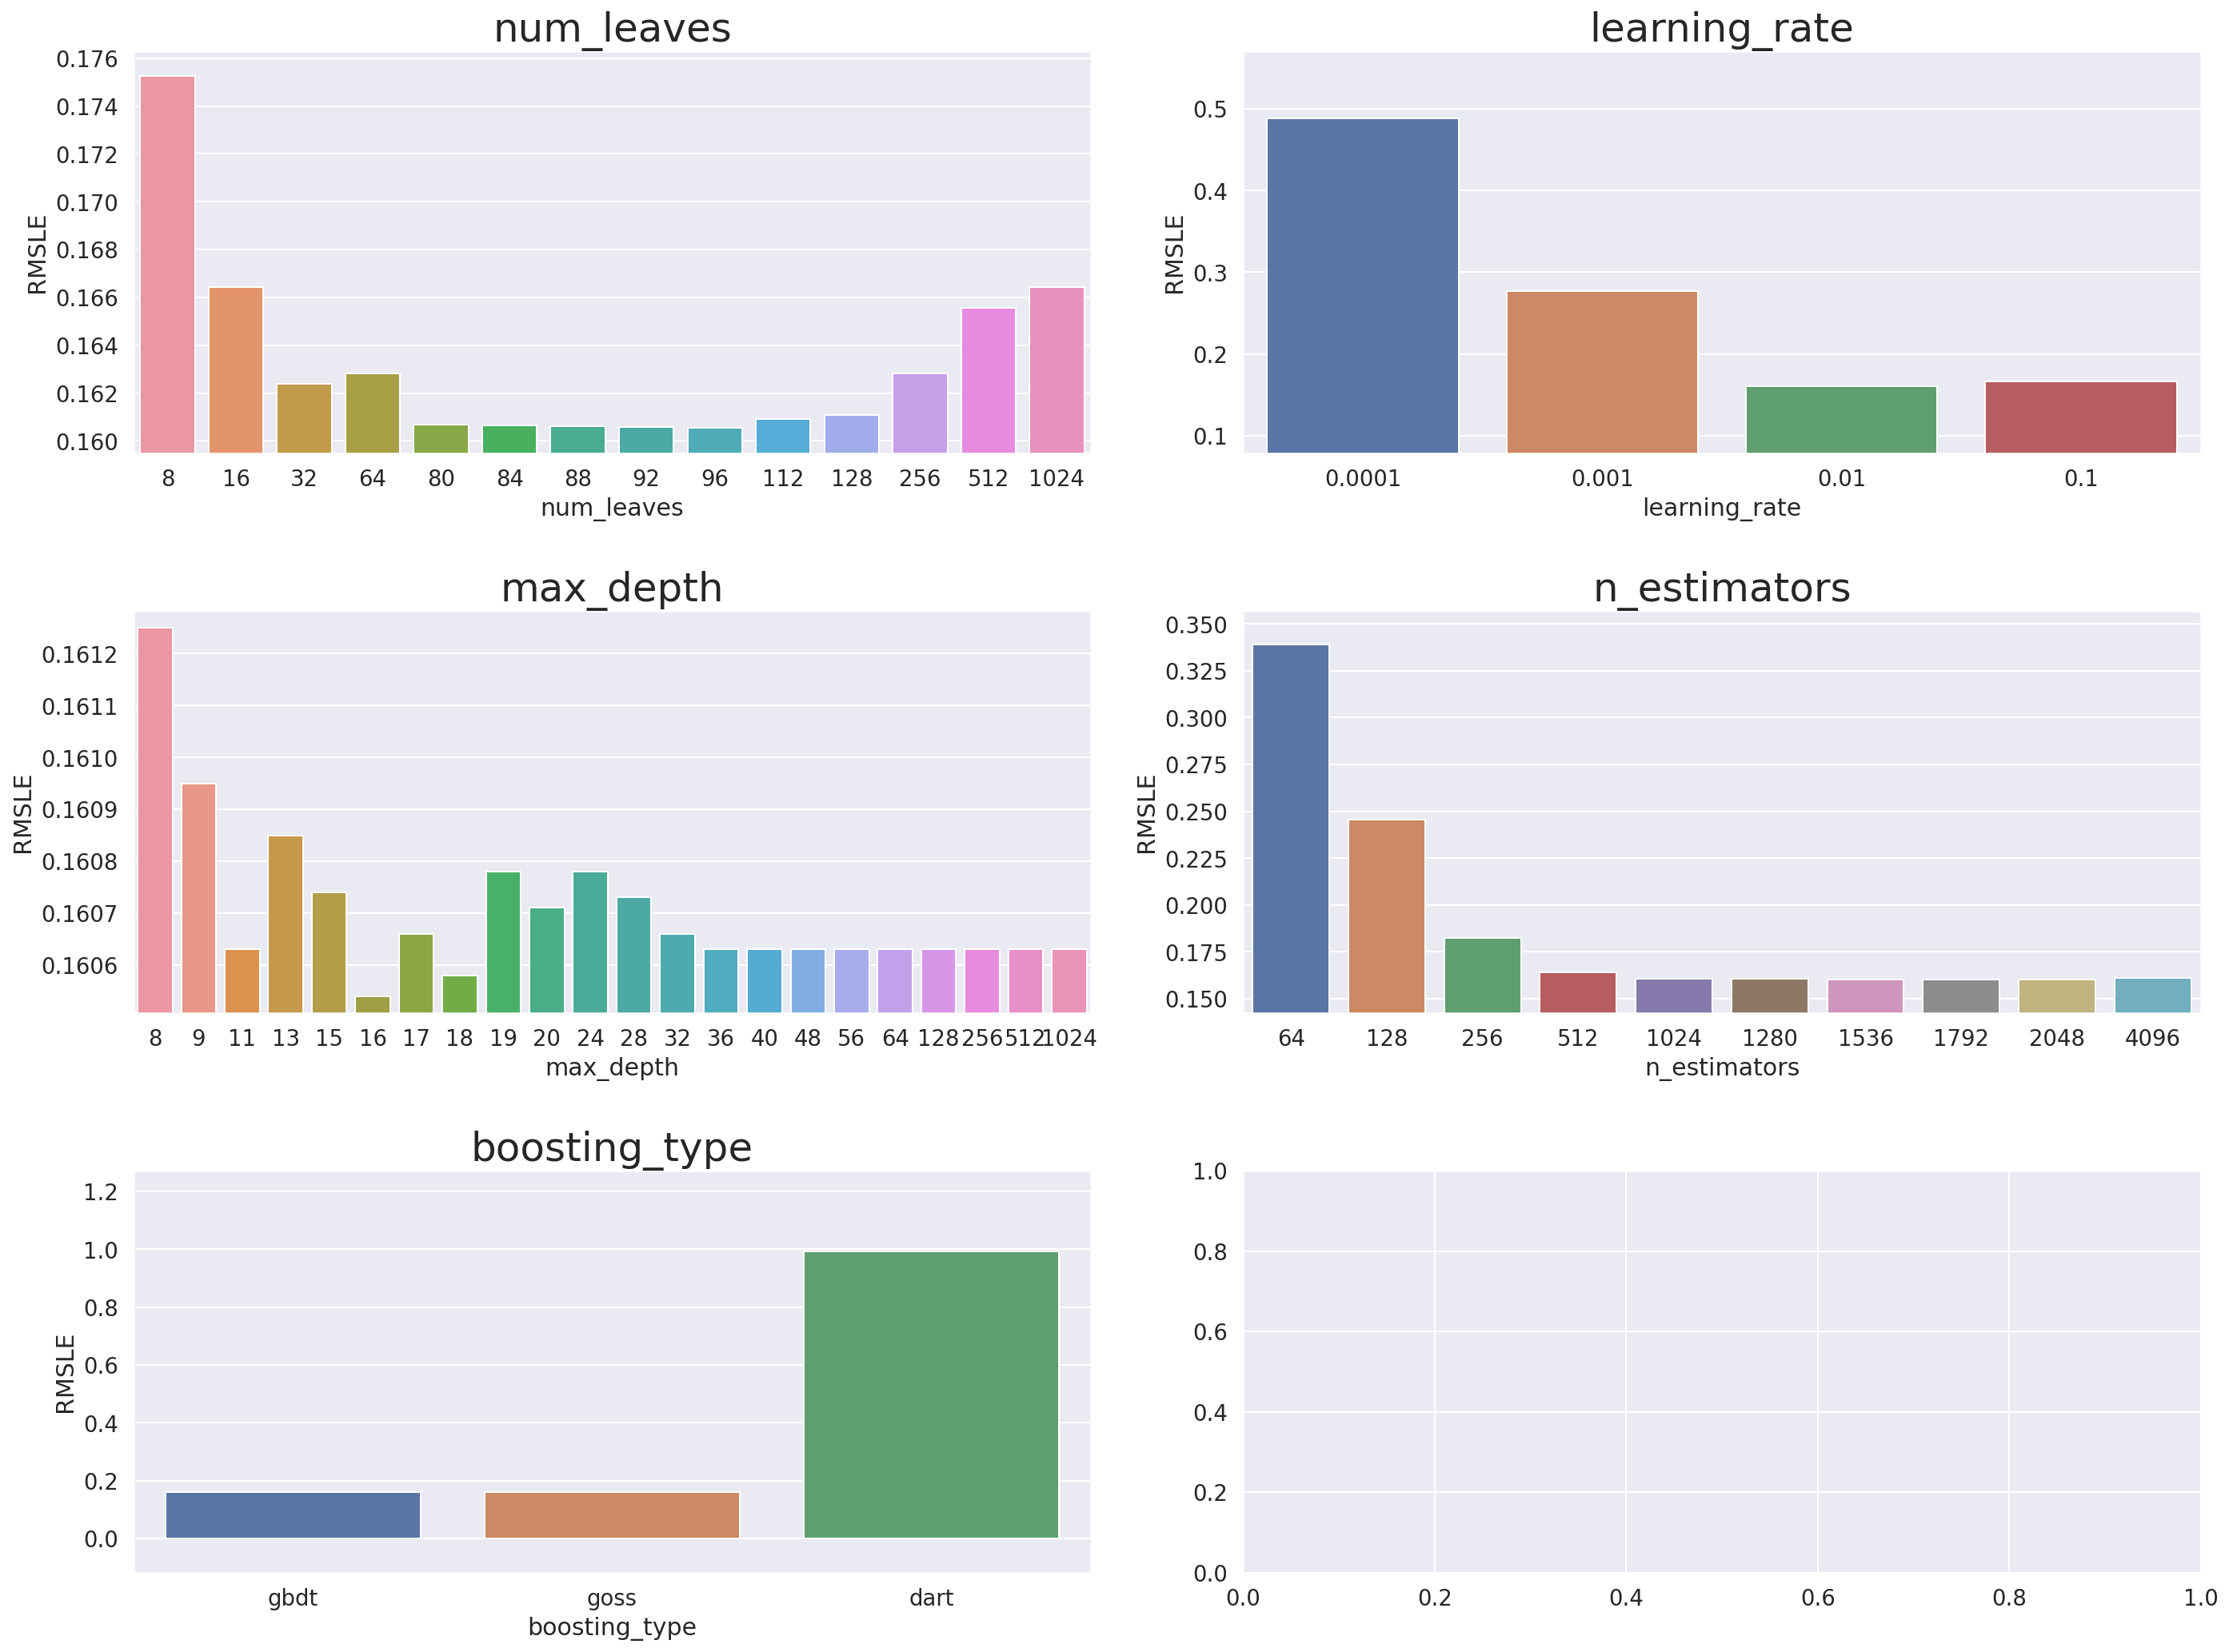

time: 1.45 s (started: 2021-02-18 15:30:47 +09:00)


In [ ]:
figure, ax = plt.subplots(3, 2, figsize=(20, 15))
ax = [ y for x in ax for y in x ]


for i in range(len(titles)):
    padding = (dfs[i]['RMSLE'].max() - dfs[i]['RMSLE'].min())/len(dfs[i]['RMSLE'])
    sns.barplot(data=dfs[i], x=titles[i], y='RMSLE', ax=ax[i])
    ax[i].set_title(titles[i], fontsize=25)
    ax[i].set_ylim(dfs[i]['RMSLE'].min()-padding, dfs[i]['RMSLE'].max()+padding)
plt.tight_layout(pad=2)

#### train model
드디어 grid search가 끝났다🥳 `optimal_parms`을 이용하여 lightBGM을 학습시켜보자.

In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': optimal_parms['num_leaves'][0],
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': optimal_parms['learning_rate'][0],
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'max_depth': optimal_parms['max_depth'][0],
    'n_estimators':optimal_parms['n_estimators'][0],
    'boosting':optimal_parms['boosting_type'][0],
    'seed':RANDOM_STATE,
    'force_col_wise': True
}
params

{'objective': 'rmse',
 'metric': 'rmse',
 'num_leaves': 96,
 'min_data_in_leaf': 10,
 'feature_fraction': 0.7,
 'learning_rate': 0.01,
 'num_rounds': 1000,
 'early_stopping_rounds': 30,
 'max_depth': 16,
 'n_estimators': 2048,
 'boosting': 'gbdt',
 'seed': 218,
 'force_col_wise': True}

time: 2.37 ms (started: 2021-02-18 15:00:53 +09:00)


In [ ]:
try_2_model, try_2_predict, try_2_RMSLE = train_lightgbm_cross_val(x_train, y_train, x_test, params)

⏳ [train_lightgbm_cross_val] start ...
[LightGBM] [Info] Total Bins 2299
[LightGBM] [Info] Number of data points in the train set: 12027, number of used features: 19
[LightGBM] [Info] Start training from score 13.044115
Training until validation scores don't improve for 30 rounds
[100]	valid_0's rmse: 0.282946
[200]	valid_0's rmse: 0.198935
[300]	valid_0's rmse: 0.173449
[400]	valid_0's rmse: 0.165175
[500]	valid_0's rmse: 0.161555
[600]	valid_0's rmse: 0.159587
[700]	valid_0's rmse: 0.158556
[800]	valid_0's rmse: 0.157982
[900]	valid_0's rmse: 0.15755
[1000]	valid_0's rmse: 0.157189
[1100]	valid_0's rmse: 0.156976
[1200]	valid_0's rmse: 0.156683
[1300]	valid_0's rmse: 0.156553
[1400]	valid_0's rmse: 0.156477
[1500]	valid_0's rmse: 0.156385
[1600]	valid_0's rmse: 0.156314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1700]	valid_0's rmse: 0.156267
Early stopping, best iteration is:
[1678]	valid_0's rmse: 0.156244
[LightGBM] [Info] Total Bins 2302
[LightGBM

### [Try 3] 더 많은 학습!

In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': optimal_parms['num_leaves'][0],
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': optimal_parms['learning_rate'][0],
    'num_rounds': 2000,
    'early_stopping_rounds': 100,
    'max_depth': optimal_parms['max_depth'][0],
    'n_estimators':optimal_parms['n_estimators'][0],
    'boosting':optimal_parms['boosting_type'][0],
    'seed':RANDOM_STATE,
    'force_col_wise': True
}
params

{'objective': 'rmse',
 'metric': 'rmse',
 'num_leaves': 96,
 'min_data_in_leaf': 10,
 'feature_fraction': 0.7,
 'learning_rate': 0.01,
 'num_rounds': 2000,
 'early_stopping_rounds': 100,
 'max_depth': 16,
 'n_estimators': 2048,
 'boosting': 'gbdt',
 'seed': 218,
 'force_col_wise': True}

time: 3.27 ms (started: 2021-02-18 15:07:09 +09:00)


In [ ]:
try_3_model, try_3_predict, try_3_RMSLE = train_lightgbm_cross_val(x_train, y_train, x_test, params)

⏳ [train_lightgbm_cross_val] start ...
[LightGBM] [Info] Total Bins 2299
[LightGBM] [Info] Number of data points in the train set: 12027, number of used features: 19
[LightGBM] [Info] Start training from score 13.044115
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.282946
[200]	valid_0's rmse: 0.198935
[300]	valid_0's rmse: 0.173449
[400]	valid_0's rmse: 0.165175
[500]	valid_0's rmse: 0.161555
[600]	valid_0's rmse: 0.159587
[700]	valid_0's rmse: 0.158556
[800]	valid_0's rmse: 0.157982
[900]	valid_0's rmse: 0.15755
[1000]	valid_0's rmse: 0.157189
[1100]	valid_0's rmse: 0.156976
[1200]	valid_0's rmse: 0.156683
[1300]	valid_0's rmse: 0.156553
[1400]	valid_0's rmse: 0.156477
[1500]	valid_0's rmse: 0.156385
[1600]	valid_0's rmse: 0.156314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1700]	valid_0's rmse: 0.156267
Early stopping, best iteration is:
[1678]	valid_0's rmse: 0.156244
[LightGBM] [Info] Total Bins 2302
[LightGB

In [ ]:
try_3_model.feature_importance()

array([ 7923,  3308,  5220, 13988, 15887,  1723,   593,  2169,  3135,
        3646, 13169,  6538, 14601,  1694, 11670, 19759, 21204, 15672,
       15049], dtype=int32)

time: 2.91 ms (started: 2021-02-18 15:56:08 +09:00)


In [ ]:
try_3_model.feature_name()

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

time: 1.99 ms (started: 2021-02-18 15:56:45 +09:00)


### [Try 4] Blending

- lightGBM에 순정을 바쳐보았지만 결과가 좋지 않았다. 점수향상을 위하여 gboost와 xgboost를 추가도 투입하여 세가지 모델을 블렌딩 해보자.
- 블렌딩에 앞서 각 모델의 하이퍼 파라미터를 지정해 주어야한다. lightGBM의 하이퍼 파리미터는 고정되어 있으니 나머지 두 모델에 대한 하이퍼 파라미터를 grid search를 통하여 탐색해보자.

#### hyper parameter turning - gboost

In [ ]:
optimal_gboost_parms = {
    'max_depth': [16],
    'n_estimators': [1024],
    'learning_rate': [0.001]
}

def copy_dict(target):
    return { key: value[:] for key, value in target.items() }

time: 470 µs (started: 2021-02-18 19:14:39 +09:00)


- **find optimal max_depth** (Try 1) [8, 16, 32, 64, 128, 256, 512, 1024]

In [ ]:
gboost_grid_max_depth_1_parms = copy_dict(optimal_gboost_parms)
gboost_grid_max_depth_1_parms['max_depth'] = [8, 16, 32, 64, 128, 256, 512, 1024]
gboost_grid_max_depth_1_model = GradientBoostingRegressor(random_state=RANDOM_STATE)
gboost_grid_max_depth_1_res = grid_search(gboost_grid_max_depth_1_model,
                                          x_train, y_train,
                                          gboost_grid_max_depth_1_parms,
                                          verbose=2,
                                          n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,max_depth,n_estimators,score,RMSLE
1,0.00100,16,1024,-0.06935,0.26335
0,0.00100,8,1024,-0.07001,0.26459
3,0.00100,64,1024,-0.07513,0.27410
4,0.00100,128,1024,-0.07513,0.27410
5,0.00100,256,1024,-0.07513,0.27410
6,0.00100,512,1024,-0.07513,0.27410
7,0.00100,1024,1024,-0.07513,0.27410
2,0.00100,32,1024,-0.07514,0.27411


⌛ [grid_search] done ...
time: 19min 23s (started: 2021-02-18 16:50:36 +09:00)


- **find optimal max_depth** (Try 1) Result<br/>
max_depth의 값이 `16`일 때, RMSLE가 `0.26335`로 최저값을 기록하였다.

In [ ]:
gboost_grid_max_depth_res = {
    'max_depth' : [8, 16, 32, 64, 128, 256, 512, 1024],
    'RMSLE': [0.26459, 0.26335, 0.27411, 0.27410, 0.27410, 0.27410, 0.27410, 0.27410]
}

gboost_grid_max_depth_res_df = pd.DataFrame(gboost_grid_max_depth_res,
                                            columns=['max_depth', 'RMSLE'])
gboost_grid_max_depth_res_df.T

,0,1,2,3,4,5,6,7
max_depth,8.00000,16.00000,32.00000,64.00000,128.00000,256.00000,512.00000,1024.00000
RMSLE,0.26459,0.26335,0.27411,0.27410,0.27410,0.27410,0.27410,0.27410


time: 11.1 ms (started: 2021-02-18 21:45:31 +09:00)


In [ ]:
# update optimal_gboost_parms
optimal_gboost_parms['max_depth'] = [ 16 ]

time: 310 µs (started: 2021-02-18 19:15:12 +09:00)


- **find optimal n_estimators** (Try 1) [64, 128, 256, 512, 1024]

In [ ]:
gboost_grid_n_estimators_1_parms = copy_dict(optimal_gboost_parms)
gboost_grid_n_estimators_1_parms['n_estimators'] = [64, 128, 256, 512, 1024]
gboost_grid_n_estimators_1_model = GradientBoostingRegressor(random_state=RANDOM_STATE)
gboost_grid_n_estimators_1_res = grid_search(gboost_grid_n_estimators_1_model,
                                              x_train, y_train,
                                              gboost_grid_n_estimators_1_parms,
                                              verbose=2,
                                              n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,max_depth,n_estimators,score,RMSLE
4,0.00100,16,1024,-0.06935,0.26335
3,0.00100,16,512,-0.12343,0.35133
2,0.00100,16,256,-0.18071,0.42510
1,0.00100,16,128,-0.22293,0.47215
0,0.00100,16,64,-0.24866,0.49866


⌛ [grid_search] done ...
time: 6min 10s (started: 2021-02-18 17:25:37 +09:00)


- **find optimal n_estimators** (Try 2) [1024, 2048]

In [ ]:
gboost_grid_n_estimators_2_parms = copy_dict(optimal_gboost_parms)
gboost_grid_n_estimators_2_parms['n_estimators'] = [1024, 2048]
gboost_grid_n_estimators_2_model = GradientBoostingRegressor(random_state=RANDOM_STATE)
gboost_grid_n_estimators_2_res = grid_search(gboost_grid_n_estimators_2_model,
                                              x_train, y_train,
                                              gboost_grid_n_estimators_2_parms,
                                              verbose=2,
                                              n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,max_depth,n_estimators,score,RMSLE
1,0.00100,16,2048,-0.04437,0.21065
0,0.00100,16,1024,-0.06935,0.26335


⌛ [grid_search] done ...
time: 9min 56s (started: 2021-02-18 19:15:24 +09:00)


- Result : n_estimators 값이 `2048` 때, RMSLE가 `0.21065`로 최저값을 기록하였다.

In [ ]:
gboost_grid_n_estimators_res = {
    'n_estimators' : [64, 128, 256, 512, 1024, 2048],
    'RMSLE': [ 0.49866, 0.47215, 0.42510, 0.35133, 0.26335, 0.21065]
}

gboost_grid_n_estimators_res_df = pd.DataFrame(gboost_grid_n_estimators_res,
                                               columns=['n_estimators', 'RMSLE'])
gboost_grid_n_estimators_res_df.T

,0,1,2,3,4,5
n_estimators,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000
RMSLE,0.49866,0.47215,0.42510,0.35133,0.26335,0.21065


time: 7.18 ms (started: 2021-02-18 21:48:09 +09:00)


In [ ]:
# update optimal_gboost_parms
optimal_gboost_parms['n_estimators'] = [ 2048 ]

time: 365 µs (started: 2021-02-18 19:28:39 +09:00)


- **find optimal learning rate** (Try 1) [0.0001, 0.001, 0.01, 0.1]

In [ ]:
gboost_grid_learning_rate_parms = copy_dict(optimal_gboost_parms)
gboost_grid_learning_rate_parms['learning_rate'] = [0.0001, 0.001, 0.01, 0.1]
gboost_grid_learning_rate_model = GradientBoostingRegressor(random_state=RANDOM_STATE)
gboost_grid_learning_rate_res = grid_search(gboost_grid_learning_rate_model,
                                            x_train, y_train,
                                            gboost_grid_learning_rate_parms,
                                            verbose=2,
                                            n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,max_depth,n_estimators,score,RMSLE
2,0.01000,16,2048,-0.04091,0.20227
3,0.10000,16,2048,-0.04105,0.20262
1,0.00100,16,2048,-0.04437,0.21065
0,0.00010,16,2048,-0.19630,0.44306


⌛ [grid_search] done ...
time: 19min 12s (started: 2021-02-18 19:29:02 +09:00)


- **find optimal max_depth**  Result<br/>
learning_rate의 값이 `0.01`일 때, RMSLE가 `0.20227`로 최저값을 기록하였다.

In [ ]:
gboost_grid_learning_rate_res = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'RMSLE': [0.44306, 0.21065, 0.20227, 0.20262]
}

gboost_grid_learning_rate_res_df = pd.DataFrame(gboost_grid_learning_rate_res,
                                            columns=['learning_rate', 'RMSLE'])
gboost_grid_learning_rate_res_df.T

,0,1,2,3
learning_rate,0.00010,0.00100,0.01000,0.10000
RMSLE,0.44306,0.21065,0.20227,0.20262


time: 7.16 ms (started: 2021-02-18 21:45:19 +09:00)


In [ ]:
# update optimal_parms
optimal_gboost_parms['learning_rate'] = [ 0.01 ]

time: 330 µs (started: 2021-02-18 20:10:32 +09:00)


- summary<br/>
하이퍼 파라미터에 따른 RMSLE 값을 나타내면 다음과 같다.

In [ ]:
titles = ['learning_rate', 'max_depth', 'n_estimators' ]
dfs = [gboost_grid_learning_rate_res_df,
       gboost_grid_max_depth_res_df,
       gboost_grid_n_estimators_res_df]

time: 397 µs (started: 2021-02-18 21:48:18 +09:00)


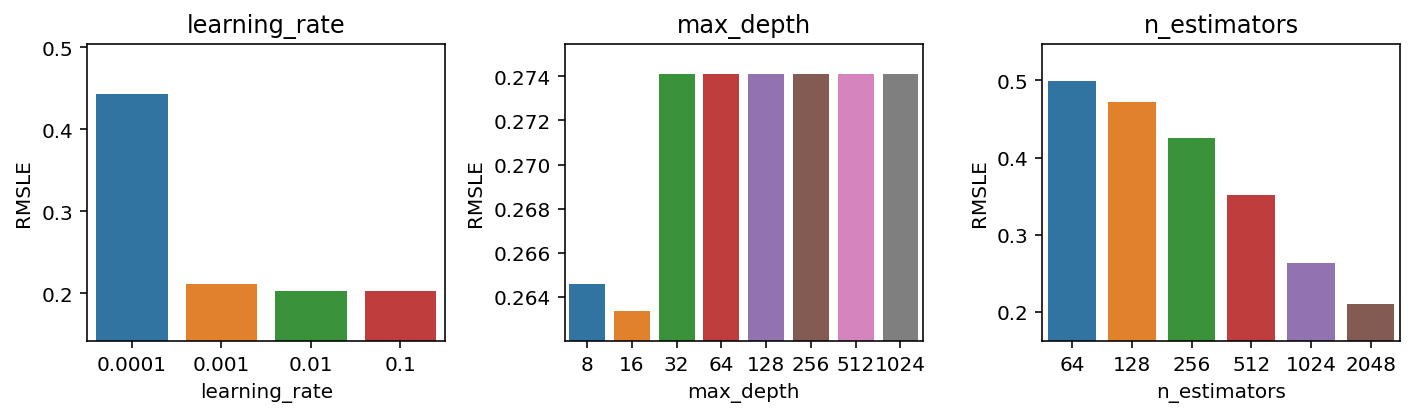

time: 438 ms (started: 2021-02-18 21:48:50 +09:00)


In [ ]:
figure, ax = plt.subplots(1, 3, figsize=(10, 3))

for i in range(len(titles)):
    padding = (dfs[i]['RMSLE'].max() - dfs[i]['RMSLE'].min())/len(dfs[i]['RMSLE'])
    sns.barplot(data=dfs[i], x=titles[i], y='RMSLE', ax=ax[i])
    ax[i].set_title(titles[i], fontsize=12)
    ax[i].set_ylim(dfs[i]['RMSLE'].min()-padding, dfs[i]['RMSLE'].max()+padding)
plt.tight_layout(pad=1)

In [ ]:
optimal_gboost_parms

{'max_depth': [16], 'n_estimators': [2048], 'learning_rate': [0.01]}

time: 1.69 ms (started: 2021-02-18 22:35:55 +09:00)


#### hyper parameter turning - xgboost

In [ ]:
optimal_xgboost_parms = {
    'reg_alpha': [0],
    'reg_lambda': [1],
    'subsample':[1],
    'learning_rate': [0.01]
}


time: 569 µs (started: 2021-02-18 20:44:53 +09:00)


- **find optimal reg_alpha** (Try 1) [0, 0.25, 0.5, 0.75, 1]

In [ ]:
xgboost_grid_reg_alpha_parms = copy_dict(optimal_xgboost_parms)
xgboost_grid_reg_alpha_parms['reg_alpha'] = [0, 0.25, 0.5, 0.75, 1]
xgboost_grid_reg_alpha_model = xgb.XGBRegressor(random_state=RANDOM_STATE)
xgboost_grid_reg_alpha_res = grid_search(xgboost_grid_reg_alpha_model,
                                            x_train, y_train,
                                            xgboost_grid_reg_alpha_parms,
                                            verbose=2,
                                            n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,reg_alpha,reg_lambda,subsample,score,RMSLE
0,0.01000,0.00000,1,1,-21.21832,4.60633
1,0.01000,0.25000,1,1,-21.21866,4.60637
2,0.01000,0.50000,1,1,-21.22071,4.60659
3,0.01000,0.75000,1,1,-21.22101,4.60663
4,0.01000,1.00000,1,1,-21.22206,4.60674


⌛ [grid_search] done ...
time: 10min 2s (started: 2021-02-18 20:46:09 +09:00)


- **find optimal reg_alpha** (Try 2) [0, 0.0625, 0.125, 0.1875, 0.25]

In [ ]:
xgboost_grid_reg_alpha_parms = copy_dict(optimal_xgboost_parms)
xgboost_grid_reg_alpha_parms['reg_alpha'] = [0, 0.0625, 0.125, 0.1875, 0.25]
xgboost_grid_reg_alpha_model = xgb.XGBRegressor(random_state=RANDOM_STATE)
xgboost_grid_reg_alpha_res = grid_search(xgboost_grid_reg_alpha_model,
                                            x_train, y_train,
                                            xgboost_grid_reg_alpha_parms,
                                            verbose=2,
                                            n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,reg_alpha,reg_lambda,subsample,score,RMSLE
1,0.01000,0.06250,1,1,-21.21809,4.60631
0,0.01000,0.00000,1,1,-21.21832,4.60633
4,0.01000,0.25000,1,1,-21.21866,4.60637
3,0.01000,0.18750,1,1,-21.21874,4.60638
2,0.01000,0.12500,1,1,-21.21882,4.60639


⌛ [grid_search] done ...
time: 10min 13s (started: 2021-02-18 20:59:47 +09:00)


- **find optimal reg_alpha (Try 3)** [0, 0.0155, 0.031, 0.0465, 0.0625]

In [ ]:
xgboost_grid_reg_alpha_3_parms = copy_dict(optimal_xgboost_parms)
xgboost_grid_reg_alpha_3_parms['reg_alpha'] = [0, 0.0155, 0.031, 0.0465, 0.0625]
xgboost_grid_reg_alpha_3_model = xgb.XGBRegressor(random_state=RANDOM_STATE)
xgboost_grid_reg_alpha_3_res = grid_search(xgboost_grid_reg_alpha_3_model,
                                            x_train, y_train,
                                            xgboost_grid_reg_alpha_3_parms,
                                            verbose=2,
                                            n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,reg_alpha,reg_lambda,subsample,score,RMSLE
1,0.01000,0.01550,1,1,-21.21795,4.60629
2,0.01000,0.03100,1,1,-21.21795,4.60629
3,0.01000,0.04650,1,1,-21.21801,4.60630
4,0.01000,0.06250,1,1,-21.21809,4.60631
0,0.01000,0.00000,1,1,-21.21832,4.60633


⌛ [grid_search] done ...
time: 10min 35s (started: 2021-02-18 21:14:56 +09:00)


- **find optimal reg_alpha** Result<br/>
reg_alpha의 값이 0.01550일 때, RMSLE가 4.60629로 최저값을 기록하였다.

In [ ]:
xgboost_grid_reg_alpha_res = {
    'reg_alpha' : [0,     0.0155, 0.031, 0.0465, 0.0625,
                   0.125, 0.1875, 0.25,   0.5,    0.75,  1],
    'RMSLE': [4.60633, 4.60629, 4.60629, 4.60630, 4.60631,
              4.60639, 4.60638, 4.60637, 4.60659, 4.60663, 4.60674]
}

xgboost_grid_reg_alpha_res_df = pd.DataFrame(xgboost_grid_reg_alpha_res,
                                            columns=['reg_alpha', 'RMSLE'])
xgboost_grid_reg_alpha_res_df.T

,0,1,2,3,4,5,6,7,8,9,10
reg_alpha,0.00000,0.01550,0.03100,0.04650,0.06250,0.12500,0.18750,0.25000,0.50000,0.75000,1.00000
RMSLE,4.60633,4.60629,4.60629,4.60630,4.60631,4.60639,4.60638,4.60637,4.60659,4.60663,4.60674


time: 10.7 ms (started: 2021-02-18 22:05:27 +09:00)


In [ ]:
optimal_xgboost_parms['reg_alpha'] = [ 4.60629 ]

time: 499 µs (started: 2021-02-18 22:05:31 +09:00)


- **find optimal reg_lambda** (Try 1) [0, 0.25, 0.5, 0.75, 1]

In [ ]:
xgboost_grid_reg_lambda_1_parms = copy_dict(optimal_xgboost_parms)
xgboost_grid_reg_lambda_1_parms['reg_lambda'] = [0, 0.25, 0.5, 0.75, 1]
xgboost_grid_reg_lambda_1_model = xgb.XGBRegressor(random_state=RANDOM_STATE)
xgboost_grid_reg_lambda_1_res = grid_search(xgboost_grid_reg_lambda_1_model,
                                            x_train, y_train,
                                            xgboost_grid_reg_lambda_1_parms,
                                            verbose=2,
                                            n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,reg_alpha,reg_lambda,subsample,score,RMSLE
0,0.01000,4.60629,0.00000,1,-21.21167,4.60561
1,0.01000,4.60629,0.25000,1,-21.21855,4.60636
2,0.01000,4.60629,0.50000,1,-21.22478,4.60704
3,0.01000,4.60629,0.75000,1,-21.22962,4.60756
4,0.01000,4.60629,1.00000,1,-21.23646,4.60830


⌛ [grid_search] done ...
time: 9min 3s (started: 2021-02-18 21:34:38 +09:00)


- **find optimal reg_lambda** (Try 2) [0, 0.0625, 0.125, 0.1875, 0.25]

In [ ]:
xgboost_grid_reg_lambda_2_parms = copy_dict(optimal_xgboost_parms)
xgboost_grid_reg_lambda_2_parms['reg_lambda'] = [0, 0.0625, 0.125, 0.1875, 0.25]
xgboost_grid_reg_lambda_2_model = xgb.XGBRegressor(random_state=RANDOM_STATE)
xgboost_grid_reg_lambda_2_res = grid_search(xgboost_grid_reg_lambda_2_model,
                                            x_train, y_train,
                                            xgboost_grid_reg_lambda_2_parms,
                                            verbose=2,
                                            n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,reg_alpha,reg_lambda,subsample,score,RMSLE
0,0.01000,4.60629,0.00000,1,-21.21167,4.60561
1,0.01000,4.60629,0.06250,1,-21.21360,4.60582
2,0.01000,4.60629,0.12500,1,-21.21465,4.60594
3,0.01000,4.60629,0.18750,1,-21.21671,4.60616
4,0.01000,4.60629,0.25000,1,-21.21855,4.60636


⌛ [grid_search] done ...
time: 9min 36s (started: 2021-02-18 21:51:21 +09:00)


- **find optimal reg_lambda** Result<br />
reg_lambda의 값이 `0`일 때, RMSLE가 `4.60561`로 최저값을 기록하였다.

In [ ]:
xgboost_grid_reg_lambda_res = {
    'reg_lambda' : [0, 0.0625, 0.125, 0.1875, 0.25, 0.5, 0.75, 1],
    'RMSLE': [4.60561, 4.60582, 4.60594, 4.60616, 4.60636, 4.60704, 4.60756, 4.60830 ]
}

xgboost_grid_reg_lambda_res_df = pd.DataFrame(xgboost_grid_reg_lambda_res,
                                              columns=['reg_lambda', 'RMSLE'])
xgboost_grid_reg_lambda_res_df.T

,0,1,2,3,4,5,6,7
reg_lambda,0.00000,0.06250,0.12500,0.18750,0.25000,0.50000,0.75000,1.00000
RMSLE,4.60561,4.60582,4.60594,4.60616,4.60636,4.60704,4.60756,4.60830


time: 7.34 ms (started: 2021-02-18 22:15:08 +09:00)


In [ ]:
optimal_xgboost_parms['reg_lambda'] = [0]

time: 369 µs (started: 2021-02-18 22:28:27 +09:00)


- **find optimal subsample** (Try 1) [0, 0.25, 0.5, 0.75, 1]

In [ ]:
xgboost_grid_subsample_1_parms = copy_dict(optimal_xgboost_parms)
xgboost_grid_subsample_1_parms['subsample'] = [0, 0.25, 0.5, 0.75, 1]
xgboost_grid_subsample_1_model = xgb.XGBRegressor(random_state=RANDOM_STATE)
xgboost_grid_subsample_1_res = grid_search(xgboost_grid_subsample_1_model,
                                            x_train, y_train,
                                            xgboost_grid_subsample_1_parms,
                                            verbose=2, n_jobs=5)

⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,reg_alpha,reg_lambda,subsample,score,RMSLE
4,0.01000,4.60629,0,1.00000,-21.21167,4.60561
3,0.01000,4.60629,0,0.75000,-21.22178,4.60671
2,0.01000,4.60629,0,0.50000,-21.23370,4.60800
1,0.01000,4.60629,0,0.25000,-21.26447,4.61134
0,0.01000,4.60629,0,0.00000,-157.72865,12.55901


⌛ [grid_search] done ...
time: 7min 24s (started: 2021-02-18 22:28:30 +09:00)


- **find optimal subsample** (Try 2) [0, 0.0625, 0.125, 0.1875, 0.25]

In [ ]:
xgboost_grid_subsample_2_parms = copy_dict(optimal_xgboost_parms)
xgboost_grid_subsample_2_parms['subsample'] = [0.938, 0.9535, 0.969, 0.9845, 1]
xgboost_grid_subsample_2_model = xgb.XGBRegressor(random_state=RANDOM_STATE)
xgboost_grid_subsample_2_res = grid_search(xgboost_grid_subsample_2_model,
                                            x_train, y_train,
                                            xgboost_grid_subsample_2_parms,
                                            verbose=2, n_jobs=5)

⏳ [grid_search] model fitting done ...
⏳[grid_search] result is ...


,learning_rate,reg_alpha,reg_lambda,subsample,score,RMSLE
4,0.01000,4.60629,0,1.00000,-21.21167,4.60561
3,0.01000,4.60629,0,0.98450,-21.21238,4.60569
2,0.01000,4.60629,0,0.96900,-21.21259,4.60571
1,0.01000,4.60629,0,0.95350,-21.21337,4.60580
0,0.01000,4.60629,0,0.93800,-21.21351,4.60581


⌛ [grid_search] done ...
time: 9min 44s (started: 2021-02-18 22:38:16 +09:00)
⏳ [grid_search] start ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

time: 7min 45s (started: 2021-02-18 22:48:00 +09:00)


- **find optimal subsample** Result<br />
reg_alpha의 값이 `1`일 때, RMSLE가 `4.60561`로 최저값을 기록하였다.

In [ ]:
xgboost_grid_subsample_res = {
    'subsample' : [0, 0.25, 0.5, 0.75,
                   0.938, 0.9535, 0.969, 0.9845, 1],
    'RMSLE': [12.55901, 4.61134, 4.60800, 4.60671,
              4.60581, 4.60580, 4.60571, 4.60569, 4.60561]
}

xgboost_grid_subsample_res_df = pd.DataFrame(xgboost_grid_subsample_res,
                                            columns=['subsample', 'RMSLE'])
xgboost_grid_subsample_res_df.T

,0,1,2,3,4,5,6,7,8
subsample,0.00000,0.25000,0.50000,0.75000,0.93800,0.95350,0.96900,0.98450,1.00000
RMSLE,12.55901,4.61134,4.60800,4.60671,4.60581,4.60580,4.60571,4.60569,4.60561


time: 8.89 ms (started: 2021-02-18 22:56:30 +09:00)


- summary <br />
하이퍼 파라미터에 따른 RMSLE 값을 나타내면 다음과 같다.

In [ ]:
titles = ['reg_alpha', 'reg_lambda', 'subsample']
dfs = [xgboost_grid_reg_alpha_res_df,
       xgboost_grid_reg_lambda_res_df,
       xgboost_grid_subsample_res_df]

time: 611 µs (started: 2021-02-18 22:58:53 +09:00)


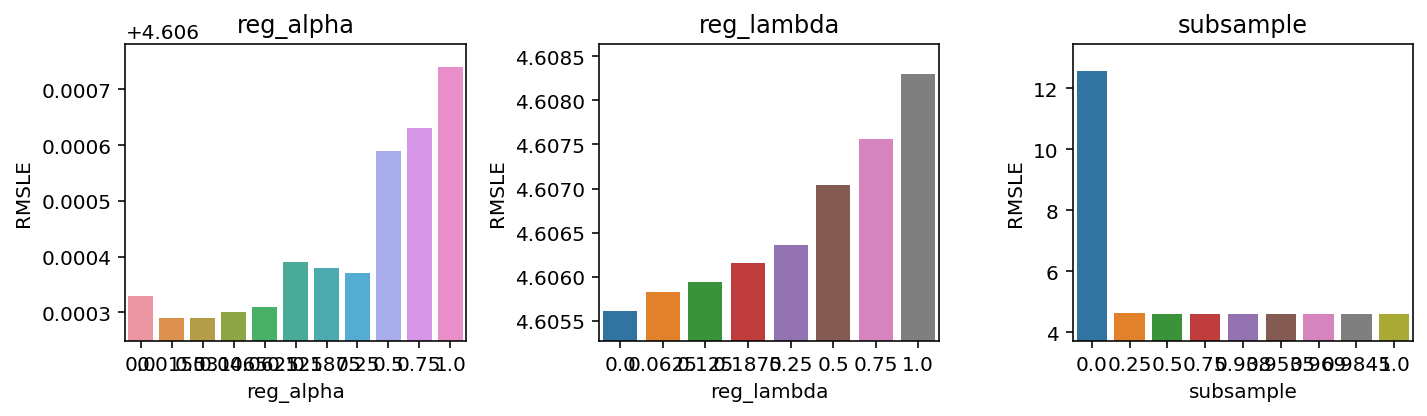

time: 535 ms (started: 2021-02-18 22:59:42 +09:00)


In [ ]:
figure, ax = plt.subplots(1, 3, figsize=(10, 3))

for i in range(len(titles)):
    padding = (dfs[i]['RMSLE'].max() - dfs[i]['RMSLE'].min())/len(dfs[i]['RMSLE'])
    sns.barplot(data=dfs[i], x=titles[i], y='RMSLE', ax=ax[i])
    ax[i].set_title(titles[i], fontsize=12)
    ax[i].set_ylim(dfs[i]['RMSLE'].min()-padding, dfs[i]['RMSLE'].max()+padding)
plt.tight_layout(pad=1)

#### Train and Predict models

- 세가지 모델을 grid searh로 탬색한 하이퍼 파라미터를 이용하여 학습시킨다.

In [ ]:
lightgbm_params = {
     'objective': 'rmse',
     'metric': 'rmse',
     'num_leaves': 96,
     'min_data_in_leaf': 10,
     'feature_fraction': 0.7,
     'learning_rate': 0.01,
     'num_rounds': 1000,
     'early_stopping_rounds': 30,
     'max_depth': 16,
     'n_estimators': 2048,
     'boosting': 'gbdt',
     'seed': 218,
     'force_col_wise': True
}

try_4_lightgbm_model, try_4_lightgbm_predict, try_4_lightgbm_RMSLE = train_lightgbm_cross_val(
                                                                       x_train,
                                                                       y_train,
                                                                       x_test,
                                                                       lightgbm_params)

⏳ [train_lightgbm_cross_val] start ...
[LightGBM] [Info] Total Bins 2299
[LightGBM] [Info] Number of data points in the train set: 12027, number of used features: 19
[LightGBM] [Info] Start training from score 13.044115
Training until validation scores don't improve for 30 rounds
[100]	valid_0's rmse: 0.282946
[200]	valid_0's rmse: 0.198935
[300]	valid_0's rmse: 0.173449
[400]	valid_0's rmse: 0.165175
[500]	valid_0's rmse: 0.161555
[600]	valid_0's rmse: 0.159587
[700]	valid_0's rmse: 0.158556
[800]	valid_0's rmse: 0.157982
[900]	valid_0's rmse: 0.15755
[1000]	valid_0's rmse: 0.157189
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.157183
[LightGBM] [Info] Total Bins 2302
[LightGBM] [Info] Number of data points in the train set: 12027, number of used features: 19
[LightGBM] [Info] Start training from score 13.044142
Training until validation scores don't improve for 30 rounds
[100]	valid_0's rmse: 0.281969
[200]	valid_0's rmse: 0.202049
[300]	valid_0's rmse: 0.17

- gboost는 시간관계상 포기하게 되었다...

In [ ]:
xboost_params = {
    'learning_rate' : 0.01,
    'max_depth' : 16,
    'n_estimators' : 2048,
    'reg_alpha' : 0.4640,
    'reg_lambda' : 0.8571,
    'subsample' : 0.52
}

try_4_xgboost_model, try_4_xgboost_predict, try_4_xgboost_RMSLE = \
    train_xgboost_cross_val(x_train, y_train, x_test, xboost_params)

⏳ [train_xgboost_cross_val] start ...
[0]	validation_0-rmse:12.42967	validation_1-rmse:12.44939
[100]	validation_0-rmse:4.56156	validation_1-rmse:4.57798
[200]	validation_0-rmse:1.68657	validation_1-rmse:1.70000
[300]	validation_0-rmse:0.64523	validation_1-rmse:0.65733
[400]	validation_0-rmse:0.28276	validation_1-rmse:0.29946
[500]	validation_0-rmse:0.16698	validation_1-rmse:0.19540
[600]	validation_0-rmse:0.12801	validation_1-rmse:0.16954
[700]	validation_0-rmse:0.10825	validation_1-rmse:0.16166
[800]	validation_0-rmse:0.09461	validation_1-rmse:0.15887
[900]	validation_0-rmse:0.08446	validation_1-rmse:0.15743
[1000]	validation_0-rmse:0.07624	validation_1-rmse:0.15665
[1051]	validation_0-rmse:0.07266	validation_1-rmse:0.15645
⏳ [train_xgboost_cross_val] RMSE: 0.15643815338719208
⌛ [train_xgboost_cross_val] done ...
time: 55.6 s (started: 2021-02-18 23:43:13 +09:00)


- Average Blending

In [ ]:
average_blending_1 = averaging_blending([try_4_lightgbm_predict, try_4_xgboost_predict])
average_blending_1

array([13.15710418, 13.0273011 , 14.10237403, ..., 13.0486309 ,
       12.65637252, 12.98090622])

time: 3.03 ms (started: 2021-02-18 23:47:23 +09:00)


In [ ]:
average_blending_2 = weight_averaging_blending([try_4_lightgbm_predict, try_4_xgboost_predict],
                                              [try_4_lightgbm_RMSLE, try_4_xgboost_RMSLE])
average_blending_2

array([13.15712015, 13.02677786, 14.10219399, ..., 13.04869794,
       12.65618708, 12.98088337])

time: 2.79 ms (started: 2021-02-18 23:47:32 +09:00)


## STEP 4. 제출
---

### [Try 1] Simple lightGBM
[Try 1]의 학습 결과를 kaggle competition page에 submission 해보자.

In [ ]:
# 예측 결과를 원래의 스케일로 되돌린다
try_1_predict_expm1 = np.expm1(try_1_predict)

# sample_submission.csv의 price에 try_1_predict_expm1를 덮어씌워 저장
save_submission(try_1_predict_expm1, 'lgbm', 15903923966068978)

array([ 517071.55372104,  482561.3834587 , 1360708.42138373, ...,
        462389.19227869,  321558.15545504,  434230.17751238])

time: 2.06 ms (started: 2021-02-18 10:36:47 +09:00)


- 결과

<img src="https://user-images.githubusercontent.com/16831323/108375932-c64a4c80-7245-11eb-9cec-ae4858a137f3.png" width="70%">

### [Try 2] lightGBM - grid search

In [ ]:
# 예측 결과를 원래의 스케일로 되돌린다
try_2_predict_expm1 = np.expm1(try_2_predict)

# sample_submission.csv의 price에 try_2_predict_expm1를 덮어씌워 저장
save_submission(try_2_predict_expm1, 'lgbm', try_2_RMSLE)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E09_kaggle/submission/submission_lgbm_RMSLE_0.1583142602700943.csv saved!
time: 32.2 ms (started: 2021-02-18 14:51:50 +09:00)


- 결과

<img src="https://user-images.githubusercontent.com/16831323/108376008-dcf0a380-7245-11eb-9e03-02664c967e1b.png" width="70%">

### [Try 3] 더 많은 학습!

In [ ]:
# 예측 결과를 원래의 스케일로 되돌린다
try_3_predict_expm1 = np.expm1(try_3_predict)

# sample_submission.csv의 price에 try_2_predict_expm1를 덮어씌워 저장
save_submission(try_3_predict_expm1, 'lgbm', try_3_RMSLE)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E09_kaggle/submission/submission_lgbm_RMSLE_0.15817774893239325.csv saved!
time: 18 ms (started: 2021-02-18 15:31:56 +09:00)


- 결과

<img src="https://user-images.githubusercontent.com/16831323/108376046-ebd75600-7245-11eb-9c2f-ac9246dbc68e.png" width="70%">

## [Try] Blending

In [ ]:
# 예측 결과를 원래의 스케일로 되돌린다
try_4_1_predict_expm1 = np.expm1(average_blending_1)

# sample_submission.csv의 price에 try_2_predict_expm1를 덮어씌워 저장
save_submission(try_4_1_predict_expm1, 'lgbm', 'ab_1')

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E09_kaggle/submission/submission_lgbm_RMSLE_ab_1.csv saved!
time: 22.6 ms (started: 2021-02-18 23:49:02 +09:00)


<img src="https://user-images.githubusercontent.com/16831323/108376107-f98cdb80-7245-11eb-83d6-706417953449.png" width="70%">

In [ ]:
# 예측 결과를 원래의 스케일로 되돌린다
try_4_2_predict_expm1 = np.expm1(average_blending_2)

# sample_submission.csv의 price에 try_2_predict_expm1를 덮어씌워 저장
save_submission(try_4_2_predict_expm1, 'lgbm', 'ab_2')

NameError: name 'np' is not defined

<img src="https://user-images.githubusercontent.com/16831323/108376167-08738e00-7246-11eb-8bff-4860ef9c5ccd.png" width="70%">

## STEP 6. 결론
---

### 프로젝트 평가
- 데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 전과정이 성공적으로 진행되었는가?
    - 전과정을 진행하였고, 시도가 실패있고 엉성하기는 submission까지 진행을 완료하였다.
- 제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었는가?
    - 나름의 기준을 가지고 기술하기는 하였으나, 캐클 커널로 올리기에는 부끄러울 것 같다. 3일 정도의 시간이 더 주어진다면 가능할지도...?
- 다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었는가?
    - 최저 점수는 112517로 점수 획득에 실패하였다.

### 회고
- 기간이 연장되었음에도 완성되지 못한 보고서를 제출하는 자신의 불성실함에 개탄을 금치 못하겠다. 다시는 이런일이 없도록 해야겠다.

> 02:19 00:26 이후 작성됨

### Summary
- 목표
    - kaggle competitioin에 참가해 봄으로써 EDA -> 전처리 -> 모델링 -> 특성 공학 Feature Engineering 을 반복하는 문제 해결과정에 익숙해 진다.
    - 위 과정을 스스로 수행하고 수행결과를 kaggle competition 페이지에 제출(submission)하여 목표 점수를 획득해 본다.
- 프로젝트 진행 과정
    - EDA
        - kaggle competiton 페이지에서 데이터를 다운로드 받아 프로젝트에 불러왔다.
        - 데이터의 featrue들의 의미와 자료형을 확인하였다.
        - 데이터에 결측치가 있는지 확인하고, 이상치 혹은 특이치의 존재 유무와 처리 방식을 구상하였다.
        - 데이터의 분포를 살피어, 만약 데이터에 치우침이 있다면 로그 변환을 통하여 정규분포의 모양에 가까워지도록 변환시켰다.
        - label이 되는 집값(price)와 다른 feature간의 상관관계를 밝히고, 각 feature 변화에 따른 price의 변화를 살펴보았다.
    - 전처리
        - EDA 과정에서 확인된 결측치/이상치/특이치에 대한 처리를 진행하였다.
        - 필요하지 않는 feature(id)를 제거하고, 적절한 형 변환(date)를 시켜주었다.
        - 데이터에서 label 데이터를 분리시켰다.
    - 모델링/하이퍼 파라미터 튜닝/제출
        - [Try 0] 프로젝트에 사용될 세개의 3가지 모델(GradientBoosting, XGBoost, LightGBM)을 대상으로 R-Squared를 구하여 모델을 성능을 평가하였다.
            - 일반적으로 R-Squared 값을 구하는 것은 데이터에 대한 모델의 설명력, 즉 모델이 해당 데이터를 얼마나 잘 예측할 수 있는가에 대한 평가 지표로 사용된다. 이를 반대로 생각해보면, 모델이 고정되어 있는 상황에서의 R=Squred 값은 모델의 입력값으로 사용하기에 데이터의 전처리가 얼마나 잘 되어있으냐를 평가하는 지표가 될 수 있을 것이다.
            - 세 모델에 모두 0.85 이상의 값을 얻었으므로 데이터의 전처리가 무난하게 이루어졌다고 판달 할 수 있었다.
        - [Try 1] LightGBM 한 번 돌려보기
            - 간단한 모델을 빠르게 학습시켜 제출까지 해보는 것으로 kaggle이 어떻게 이루어지는지 흐름을 확인하고자 하였다.
            - 임의로 구성된 하이퍼 파라미터들을 입력값으로 가지는 LightGBM을 학습시키고 그 결과를 확인하였다.
            - LightGBM을 사용한 이유는 세가지 모델 학습속도가 가장 빠르기 때문이었다.
            - 모델의 예측 결과를 이용하여 submission 파일(csv)를 생성하였다.
            - score : 113438
        - [Try 2] LightGBM의 하이퍼 파라미터를 찾아서 (Hyperparameters turning)
            - [Try 1]에서 목표 점수와 유사한 점수의 값을 얻을 수 있었다. 이에 lightGBM에 매우 큰 기대를 가지게 되어 lightGBM에 대한 하이퍼 파라미터 튜닝을 시작하였다.
            - gird search 기법을 사용하였으며, 기본적인 컨셉은 넓은 범위에서 먼저 탐색을 하고 점점 그 범위를 좁혀가며 원하는 최적지점을 찾는 것이었다. 튜닝 대상이 된 파라미터는 `learning_rate`, `n_estimators`, `max_depth`였다. grid search를 통하여 각 파라미터에 가장 적합한 값을 도출해 냈다.
            - 위의서 찾은 하이퍼 파라미터를 이용하여 모델을 학습시키고, 예측 결과를 구하였다.
            - score : 112517
        - [Try 3] 모델의 학습에 부족한 것이 보이는가? 없다면 학습을 더 많이 시켜보자.
            - 위에서 학습시킨 모델의 딱 두배 더(num_rounds=2000) 학습을 시켜보았다.
            - score : 112318
        - [Try 4] 아직도 부족한 것이 보이진 않는다면 모델의 예측 결과를 썩어보자.
            - 이전에는 사용하지 않았던 두개의 모델을 사용하여 블랜딩을 진행하고자 하였다.
            - 블랜딩을 하기 위해서는 모델이 학습되어 예측값을 도출해낼 수 있어야 한다. 이왕이면 다홍치마로 좋은 파라미터로 적절히 학습된 모델의 예측값을 섞는 것이 임의로 정한 파라미터를 사용한 것 보다 좋을 것이라 색각하였다. 그리하여 블랜딩에 앞서 GradientBoosting, XGBoost에 대하여 grid search를 적용하여 최적화된 파라미터 값을 찾고자 하였다.
            - 이 단계에서부터 두 모델의 학습에 시간의 아주 많이 소요 되었고 몇몇 값(ex. xgboost.reg_lambda)은 시간부족으로 적절한 범위까지 파고들어 정확한 값을 찾아내는 활동을 전부 수행하지 못하였다.
            - 파라미터 값을 찾은 후, 모델을 학습시키는 부분의 경우 초기에 kfold로 작성되었었다. 이후 train_test_split를 활용하여 나눈 데이터를 한번 학습하는 방식으로 변경하였다. 이는 속도의 문제가 가장 컸고 다음으로는 데이터가 충분히 큰 상태라면 꼭 Kfold를 진행한 필요가 없기 때문이었다.
            - GradientBoosting의 경우 파라미터 준비도 다 하였지만, 학습을 기다리는 시간이 플랭크를 하는 시간마냥 너무 길게 느껴졌고 효율을 위하여 더 이상 사용하지 않기로 하였다.
            - 결국, LightGBM과 XGBoost를 이용하여 블랜딩을 진행하였다. 단순히 평균을 구하는 방식 하나와 RMSLE를 가중치로 사용하여 각 모델별로 결과 값에 대한 기여도를 조정하는 방식까지 총 두 가지 방식을 준비하였다.
            - score_방식1 : 113664
            - score_방식2 : 113682
            - 충분히 유의미한 점수라고 생각한다. 시간을 잘 조절하여 XGBoost의 하이퍼 파라미터는 더 잘 탐색했다면 110000 밑으로 점수가 내려갈 수 있지 않았을까? 생각해본다.

### 회고
- 이번 프로젝트에서 **어려웠던 점,**
    - 통계적 지식이 부족한 점이 프로젝트의 난이도를 수직상승 시켰다. 위에서 모델을 돌리는 과정에서 시간이 부족했다라고 많이 언급하였지만 진정한 시간 도둑은 EDA였다. 데이터를 어떻게 그래프로 나타내야 어떤 부분을 알 수 있는 것인지, 이런저런 지표들이 있다고 하는데 그것이 어떤 것인지 모른다거나 하는 상황들이 계속 발생하였고 그것을 알아가는 과정도 매우 힘들었다. 익숙하지 않은 도메인의 지식을 습득하는 것에 대한 두려움과 힘듬이 가중되었고 결국 제 시간내에 EDA와 전처리를 완수하지 못하여 설계한 모델을 돌려보지도 못한 참사가 발생하였다. 금번 노드 이전에도 시간에 쫓기는 경험은 다수 있었지만, 이번것처럼 마음에 들지 않는 결과는 처음이라 다시는 이런 상황이 발생하지 않도록 노력해야겠다.

## Code Collection
---

#### environment setting
- import packages
- set directory path
- load extensor to measure cell running time
- initialization gpu

In [ ]:
# import packages ########################################################
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GroupKFold, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import xgboost as xgb
import lightgbm as lgb

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 고해상도 그래퍼
%config Completer.use_jedi = False

# float를 소수점 5째 자리까지 표현
pd.options.display.float_format = '{:.5f}'.format
# 더 많은 column 출력
pd.set_option('display.max_columns', 100)

# load extensor to measure cell running time ###############################
%load_ext autotime


# set directory path# #######################################################
workspace_path = os.getenv('HOME')+'/workspace/aiffel-exploration-workspace/E09_kaggle'
train_data_path = join(workspace_path + '/data', 'train.csv')
sub_data_path = join(workspace_path + '/data', 'test.csv')
RANDOM_STATE = 218


# initialization gpu ########################################################
def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
      try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
          tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs\n\n")
      except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e, "\n\n")

init_gpu()

1 Physical GPUs, 1 Logical GPUs


time: 137 ms (started: 2021-02-18 19:10:08 +09:00)


#### load csv : load_csv

In [ ]:
def load_csv(path): return pd.read_csv(path)

time: 312 µs (started: 2021-02-18 19:10:08 +09:00)


#### rmse

In [ ]:
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

time: 8.83 ms (started: 2021-02-18 19:10:08 +09:00)


#### get R-squared value : get_cv_score

In [ ]:
def get_cv_score(x_train, y_train, models):
    kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE).get_n_splits(x_train.values)
    for m in models:
        score = np.mean(cross_val_score(m['model'], x_train.values, y_train, cv=kfold))
        print(f"Model {m['name']} CV score : {score:.4f}")

time: 567 µs (started: 2021-02-18 19:10:08 +09:00)


#### Train lightgbm + cross validation

In [ ]:
def train_lightgbm_cross_val(x_train, y_train, x_test, params):
    folds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    oof_preds = np.zeros(x_train.shape[0]) # 훈련한 모델에 validation dataset 을 입력했을 때 나오는 출력 값
    sub_preds = np.zeros(x_test.shape[0]) # 훈련한 모델에 test dataset 을 입력했을 때 나오는 출력 값

    print(f'⏳ [train_lightgbm_cross_val] start ...')

    for fold_, (trn_, val_) in enumerate(folds.split(x_train)):
        trn_x, trn_y = x_train.iloc[trn_], y_train.iloc[trn_]
        val_x, val_y = x_train.iloc[val_], y_train.iloc[val_]

        train_ds = lgb.Dataset(trn_x, label=trn_y)
        valid_ds = lgb.Dataset(val_x, label=val_y)
        model = lgb.train(params=params,
                          train_set=train_ds,
                          valid_sets=valid_ds,
                          verbose_eval=100)

        oof_preds[val_] = model.predict(val_x.values)
        sub_preds += model.predict(x_test) / folds.n_splits

    RMSLE = np.sqrt(mean_squared_error(y_train, oof_preds.clip(0.,20.)))
    print('⏳ [train_lightgbm_cross_val] RMSE:', RMSLE)
    print('⌛ [train_lightgbm_cross_val] done ...')
    return model, sub_preds, RMSLE

time: 885 µs (started: 2021-02-18 19:10:08 +09:00)


#### Train gboost + cross validation

In [ ]:
def train_gboost_cross_val(x_train, y_train, x_test, params):
    folds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    oof_preds = np.zeros(x_train.shape[0]) # 훈련한 모델에 validation dataset 을 입력했을 때 나오는 출력 값
    sub_preds = np.zeros(x_test.shape[0]) # 훈련한 모델에 test dataset 을 입력했을 때 나오는 출력 값

    print(f'⏳ [train_gboost_cross_val] start ...')

#     for fold_, (trn_, val_) in enumerate(folds.split(x_train)):
#         print()
#         trn_x, trn_y = x_train.iloc[trn_], y_train.iloc[trn_]
#         val_x, val_y = x_train.iloc[val_], y_train.iloc[val_]

#         model = GradientBoostingRegressor(max_depth=params['max_depth'],
#                                           n_estimators=params['n_estimators'],
#                                           learning_rate=params['learning_rate'],
#                                           min_samples_leaf=15,
#                                           min_samples_split=10,
#                                           loss='huber',
#                                           random_state=RANDOM_STATE)
#         model.fit(trn_x, trn_y, early_stopping_rounds=2)

#         oof_preds[val_] = model.predict(val_x.values)
#         sub_preds += model.predict(x_test) / folds.n_splits

    model = GradientBoostingRegressor(max_depth=params['max_depth'],
                                          n_estimators=params['n_estimators'],
                                          learning_rate=params['learning_rate'],
                                          min_samples_leaf=15,
                                          min_samples_split=10,
                                          loss='huber',
                                          random_state=RANDOM_STATE)
    model.fit(x_train, y_train)

    RMSLE = np.sqrt(mean_squared_error(y_train, oof_preds.clip(0.,20.)))
    print('⏳ [train_gboost_cross_val] RMSE:', RMSLE)
    print('⌛ [train_gboost_cross_val] done ...')
    return model, sub_preds, RMSLE

time: 1.03 ms (started: 2021-02-18 23:23:13 +09:00)


#### Train xgboost + cross validation

In [ ]:
def train_xgboost_cross_val(x_train, y_train, x_test, params):
    folds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    oof_preds = np.zeros(x_train.shape[0]) # 훈련한 모델에 validation dataset 을 입력했을 때 나오는 출력 값
    sub_preds = np.zeros(x_test.shape[0]) # 훈련한 모델에 test dataset 을 입력했을 때 나오는 출력 값

    print(f'⏳ [train_xgboost_cross_val] start ...')

#     for fold_, (trn_, val_) in enumerate(folds.split(x_train)):
#         trn_x, trn_y = x_train.iloc[trn_], y_train.iloc[trn_]
#         val_x, val_y = x_train.iloc[val_], y_train.iloc[val_]

#         model = xgb.XGBRegressor(learning_rate=params['learning_rate'],
#                                  reg_alpha=params['reg_alpha'],
#                                  reg_lambda=params['reg_lambda'],
#                                  subsample=params['subsample'],
#                                  max_depth=16,
#                                  n_estimators=2048,
#                                  random_state=RANDOM_STATE)
#         model.fit(trn_x, trn_y,
#                   eval_set=[(trn_x, trn_y), (val_x, val_y)],
#                   early_stopping_rounds=10,
#                   verbose=100)

#         oof_preds[val_] = model.predict(val_x.values)
#         sub_preds += model.predict(x_test) / folds.n_splits

    model = xgb.XGBRegressor(learning_rate=params['learning_rate'],
                                 reg_alpha=params['reg_alpha'],
                                 reg_lambda=params['reg_lambda'],
                                 subsample=params['subsample'],
                                 max_depth=16,
                                 n_estimators=2048,
                                 random_state=RANDOM_STATE)

    X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2,
                                                        random_state=RANDOM_STATE)


    model.fit(X_train, Y_train,
             eval_set=[(X_train, Y_train), (X_test, Y_test)],
                  early_stopping_rounds=10,
                  verbose=100)

    predicts_val = model.predict(X_test)

    RMSLE = np.sqrt(mean_squared_error(Y_test, predicts_val))
    predicts = model.predict(x_test)
    print('⏳ [train_xgboost_cross_val] RMSE:', RMSLE)
    print('⌛ [train_xgboost_cross_val] done ...')
    return model, predicts, RMSLE

time: 933 µs (started: 2021-02-18 23:43:10 +09:00)


#### grid search

In [ ]:
def grid_search(model, x_train, y_train, param_grid, verbose=2, n_jobs=5):
    print(f'⏳ [grid_search] start ...')

    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model,
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=5,
                              verbose=verbose,
                              n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(x_train, y_train)

    print(f'⏳ [grid_search] model fitting done ...')

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    print(f'⏳[grid_search] result is ...')
    display(results)

    params = { p : results[:1][p].values[0] for p in param_grid.keys() }

    print(f'⌛ [grid_search] done ...')

    return params

time: 953 µs (started: 2021-02-18 19:10:08 +09:00)


#### save submission

In [ ]:
def save_submission(prediction, model_name, rmsle=None):
    data_dir = workspace_path + '/data/'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction

    submission_dir = workspace_path + '/submission'
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(submission_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

time: 459 µs (started: 2021-02-18 19:10:09 +09:00)


#### Average Blending

In [ ]:
def averaging_blending(predicts):
    return np.mean(predicts, axis=0)

time: 445 µs (started: 2021-02-18 23:47:22 +09:00)


In [ ]:
def weight_averaging_blending(predicts, scores):
    lower = (1./scores[0]) + (1./scores[1])
    upper = sum([predicts[i] * (1/scores[i]) for i in range(len(predicts))])

    return upper / lower

time: 601 µs (started: 2021-02-18 23:46:30 +09:00)


## ref
---
- [Part 1. What is Ensemble Learning?](https://subinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4.)
- [Ensemble Learning: Stacking, Blending & Voting](https://towardsdatascience.com/ensemble-learning-stacking-blending-voting-b37737c4f483)
- [상관계수 총정리 끝판왕](https://mansoostat.tistory.com/115)
- [House Price Prediction EDA](https://www.kaggle.com/chocozzz/house-price-prediction-eda-updated-2019-03-12)
- [Seaborn(SNS)를 사용한 파이썬 데이터 시각화 기초 matplotlib](https://chancoding.tistory.com/12)
- [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
- [Python 통계 기초-14. 잔차분석](https://mindscale.kr/course/basic-stat-python/14)
- [R-squared, 결정계수](https://jihongl.github.io/2017/09/16/Rsquared/)
- [데이터사이언스스쿨-4.1 회귀분석 예제](https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html)
- [왜도와 첨도가 분포에 미치는 영향](https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/how-skewness-and-kurtosis-affect-your-distribution/)
- [lightGBM 교차검증(Cross Validation) 치트코드](http://machinelearningkorea.com/2019/08/04/lightgbm-%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9Dcross-validation-%EC%B9%98%ED%8A%B8%EC%BD%94%EB%93%9C/)
- [[Predict Future Sales] playground 커널 리뷰 2](https://dailyheumsi.tistory.com/110)
- [R-squared, 결정계수](https://jihongl.github.io/2017/09/16/Rsquared/
)
- [XGBoost](https://crazyj.tistory.com/224)
- [kaggle 주택 가격 예측(4) - 모델 앙상블으로 등수 올리기(상위 13%)](https://dining-developer.tistory.com/23?category=936486)